
##  **Data Science Project**


**Project on “Census Income” Dataset**

***Importing Libraries***

In [ ]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing Pre Processing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Importing Metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, recall_score, confusion_matrix, precision_score
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
#Importing Models :
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Importing Imputer and Pipeline :
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

**Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_copy = pd.read_csv("/content/drive/MyDrive/Census-Income-Project/census-income.csv")

Mounted at /content/drive


In [ ]:
data = data_copy.copy()

**Interpreting The Dataset**

In [ ]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

In [ ]:
#So we have 32561 rows and 15 columns of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
                   object
dtype: object

In [ ]:
#Taking on account all the object datatype features :
data.describe(include=['object']).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
,32561,2,<=50K,24720


In [ ]:
for i in data.describe(include=['object']).columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True)*100)
    print('*'*50)

Unique values in  workclass are :
 Private             69.703019
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
 ?                    5.638647
 State-gov            3.986364
 Self-emp-inc         3.427413
 Federal-gov          2.948312
 Without-pay          0.042996
 Never-worked         0.021498
Name:  workclass, dtype: float64
**************************************************
Unique values in  education are :
 HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
 11th             3.608612
 Assoc-acdm       3.276926
 10th             2.865391
 7th-8th          1.983969
 Prof-school      1.768987
 9th              1.578576
 12th             1.329812
 Doctorate        1.268389
 5th-6th          1.022696
 1st-4th          0.515955
 Preschool        0.156629
Name:  education, dtype: float64
**************************************************
Unique values in  marital-status are :
 Married-civ-s

In [ ]:
#Checking for any null values
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
                   0
dtype: int64

In [ ]:
#Renaming the last column which is our target feature
data.rename(columns={' ': 'annual_income'}, inplace=True)

In [ ]:
#Removing Whitespaces from the columns
data.columns = data.columns.str.replace(" ","")
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
# Extract the "education" column and store it in "census_ed"
census_ed = data['education']

# Extract columns from "age" to "relationship" and store it in "census_seq"
census_seq = data.loc[:, 'age':'relationship']

# Extract columns at index 5, 8, and 11 and store it in "census_col"
census_col = data.iloc[:, [5, 8, 11]]

# Extract all male employees who work in "state-gov" and store it in "male_gov"
male_gov = data[(data['sex'] == ' Male') & (data['workclass'] == ' State-gov')]

# Extract all 39-year-olds with a bachelor's degree or native to United States
census_us = data[(data['age'] == 39) & ((data['education'] == ' Bachelors') | (data['native-country'] == ' United-States'))]

# Extract 200 random rows and store it in "census_200"
census_200 = data.sample(n=200, random_state=42)

# Get the count of different levels of the "workclass" column
workclass_counts = data['workclass'].value_counts()

# Calculate the mean of "capital-gain" column grouped by "workclass"
capital_gain_mean_by_workclass = data.groupby('workclass')['capital-gain'].mean()


census_ed:
0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object
census_seq:
       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22

# **EDA**

## **Univariate Analysis**

In [ ]:
def histogram_boxplot(feature,figsize=(15,8),bins= None):
  f2,(ax_box2,ax_hist2) = plt.subplots(nrows= 2,# Number of rows of the subplot grid= 2
                                       sharex= True,# x-axis will be shared among all subplots
                                       gridspec_kw= {"height_ratios":(0.25,0.75)} , #This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
                                       figsize = figsize)#Defines the relative heights of the rows. Each row gets a relative height of height_ratios[i]
  sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet',orient="h") # boxplot will be created and a star will indicate the mean value of the column
  sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
  ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
  ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

*Observations on Age*

<ipython-input-18-a818a0534724>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram


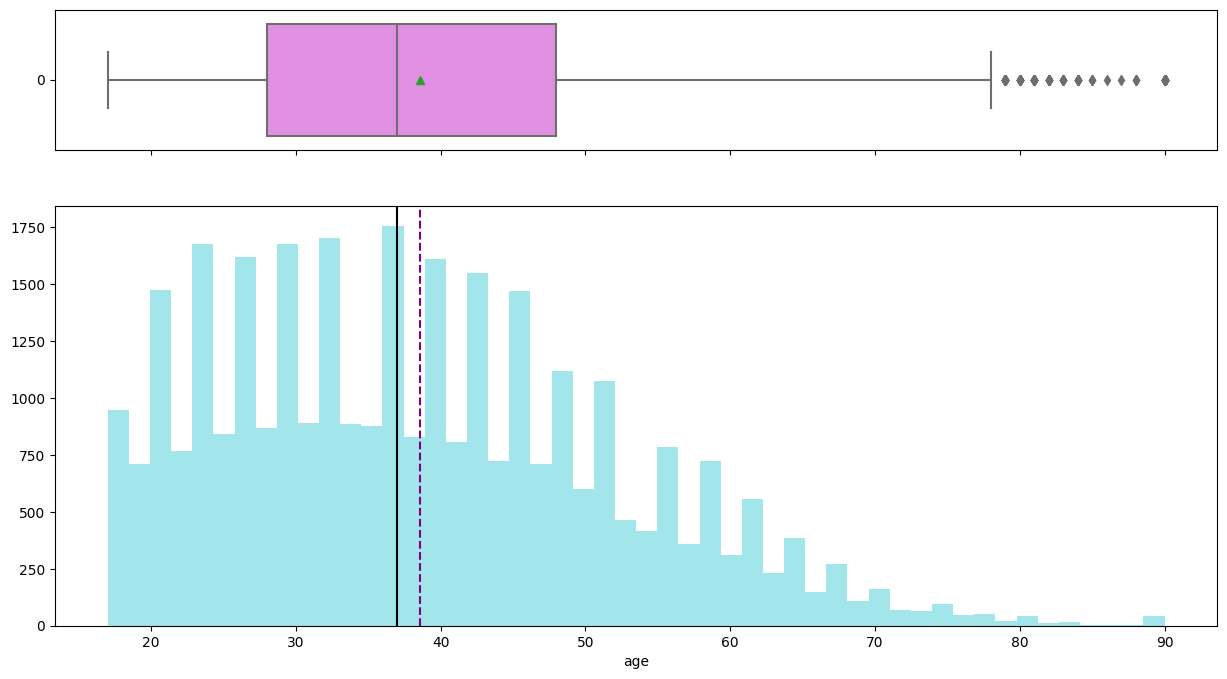

In [ ]:
histogram_boxplot(data['age'])

*Observations on Education-Num*

<ipython-input-18-a818a0534724>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram


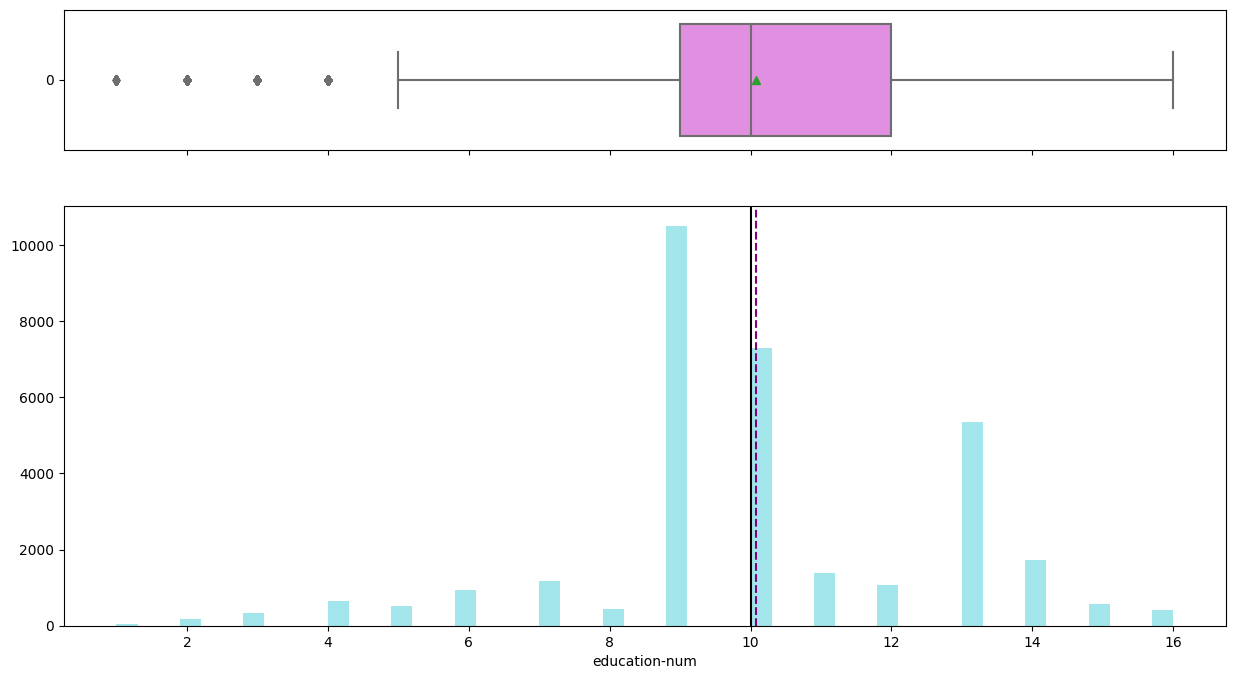

In [ ]:
histogram_boxplot(data['education-num'])

<ipython-input-18-a818a0534724>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram


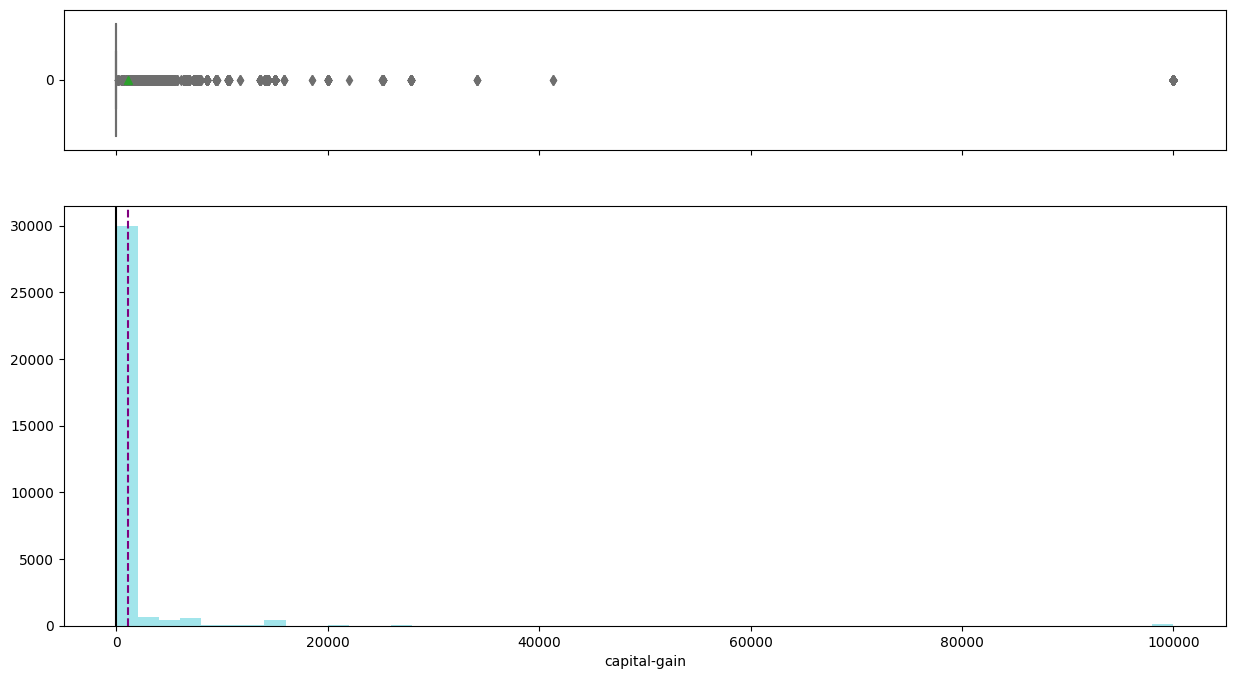

In [ ]:
histogram_boxplot(data['capital-gain'])

<ipython-input-18-a818a0534724>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram


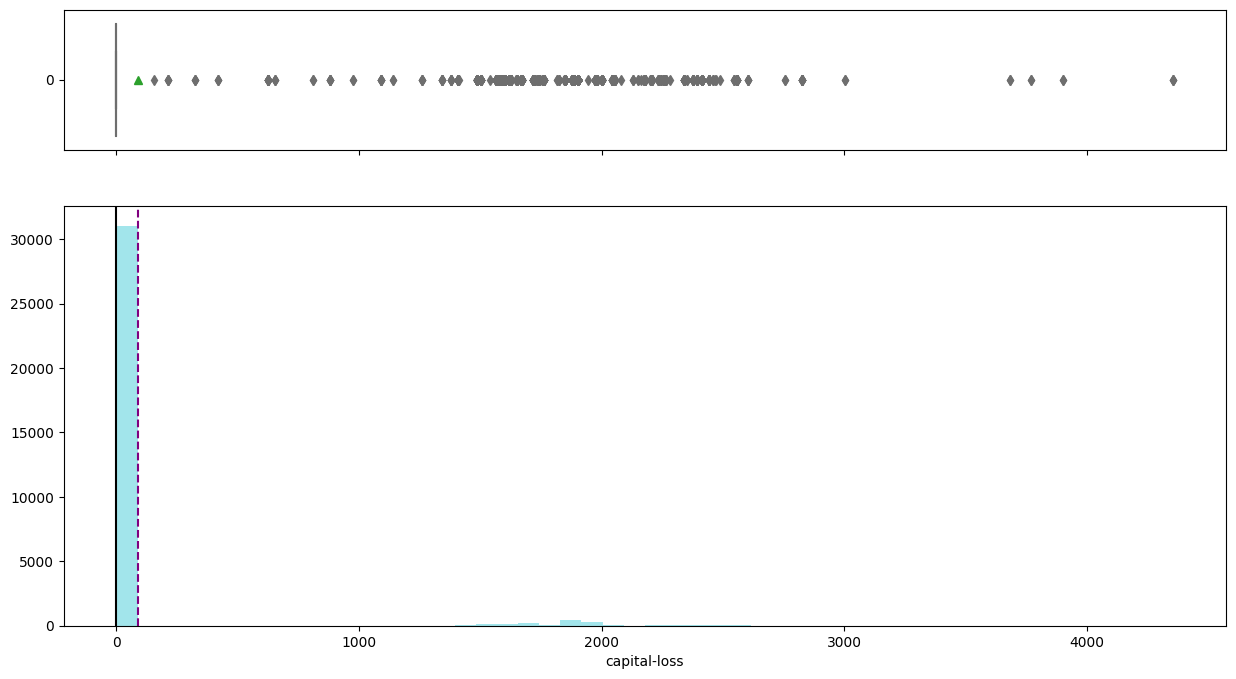

In [ ]:
histogram_boxplot(data['capital-loss'])

<ipython-input-18-a818a0534724>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram


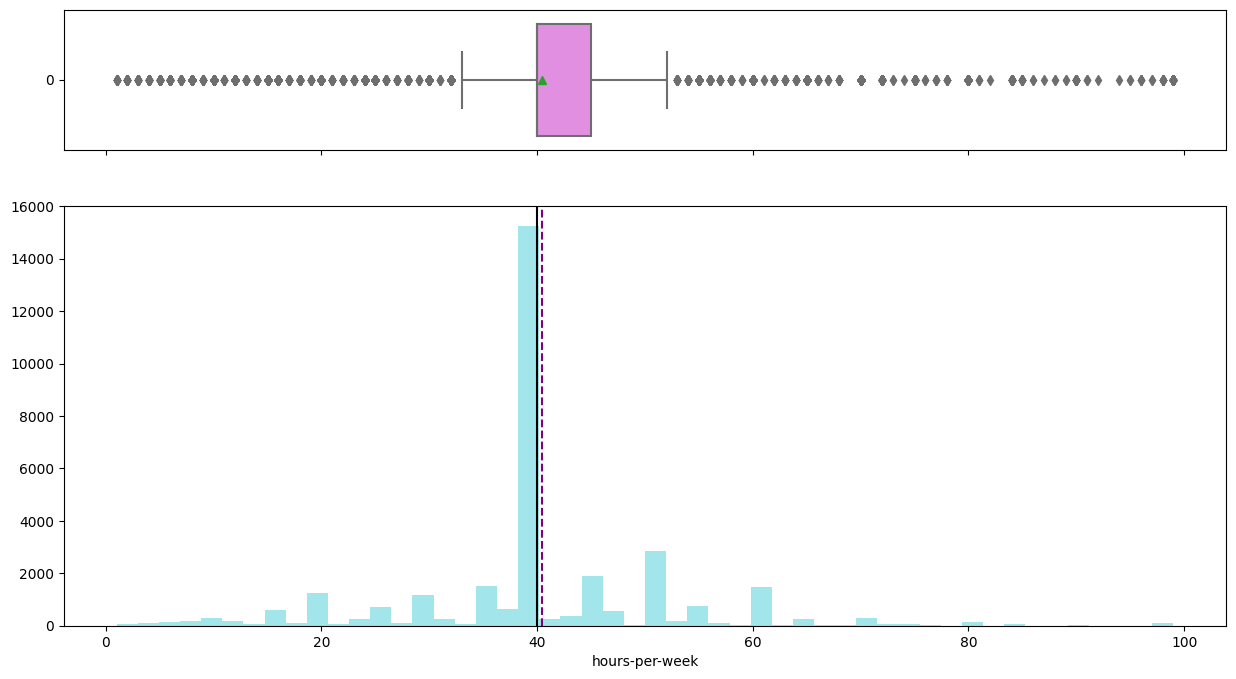

In [ ]:
histogram_boxplot(data['hours-per-week'])

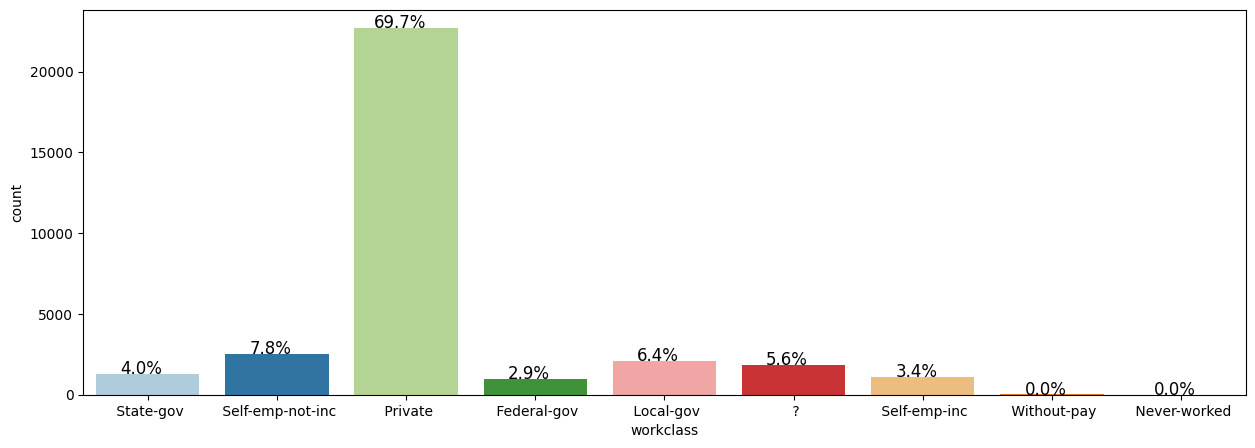

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    total = len(data[z])
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05    # width of the plot
        y = p.get_height()                          # height of the plot
        ax.annotate(percentage, (x, y), size=12, ha='center')     # annotate the percantage
    plt.show()


perc_on_bar('workclass')


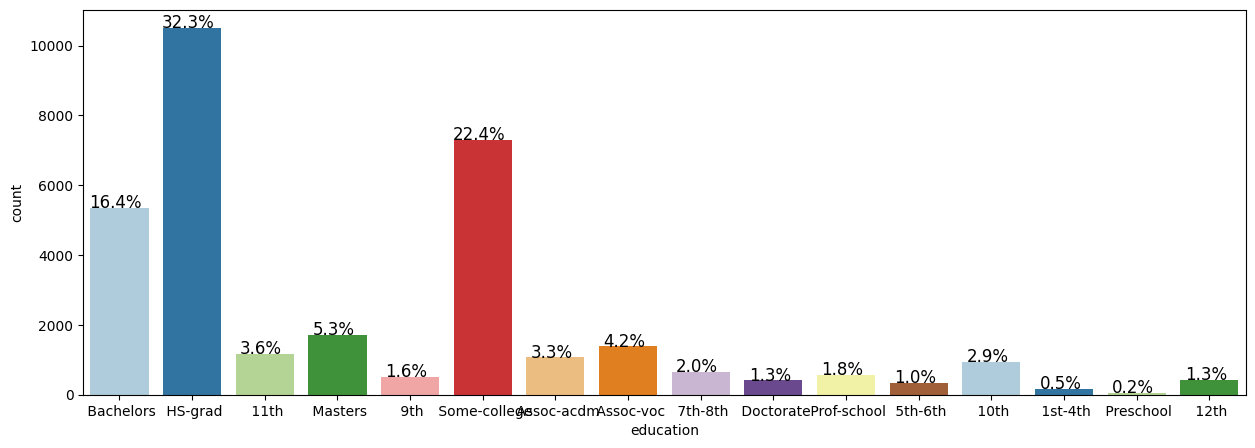

In [ ]:
perc_on_bar("education")

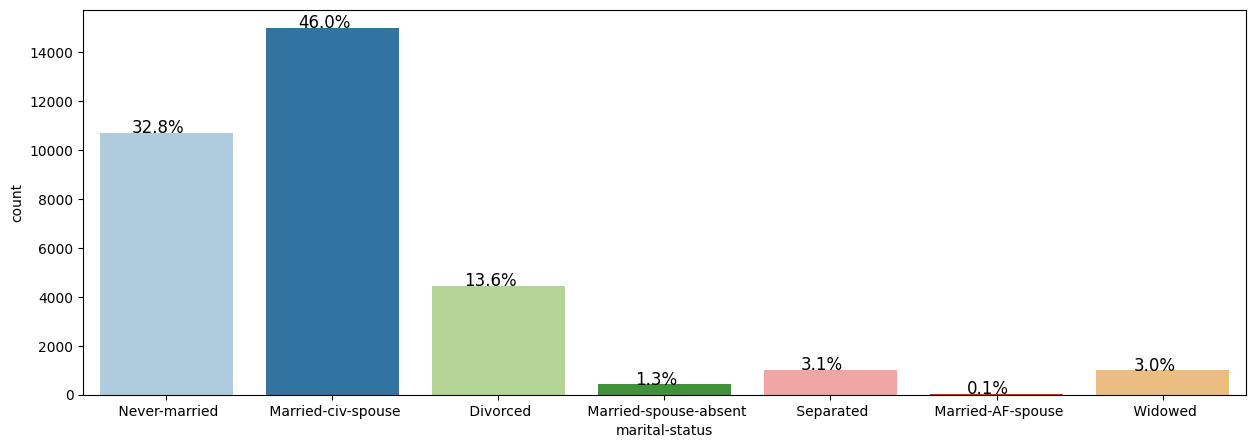

In [ ]:
perc_on_bar('marital-status')

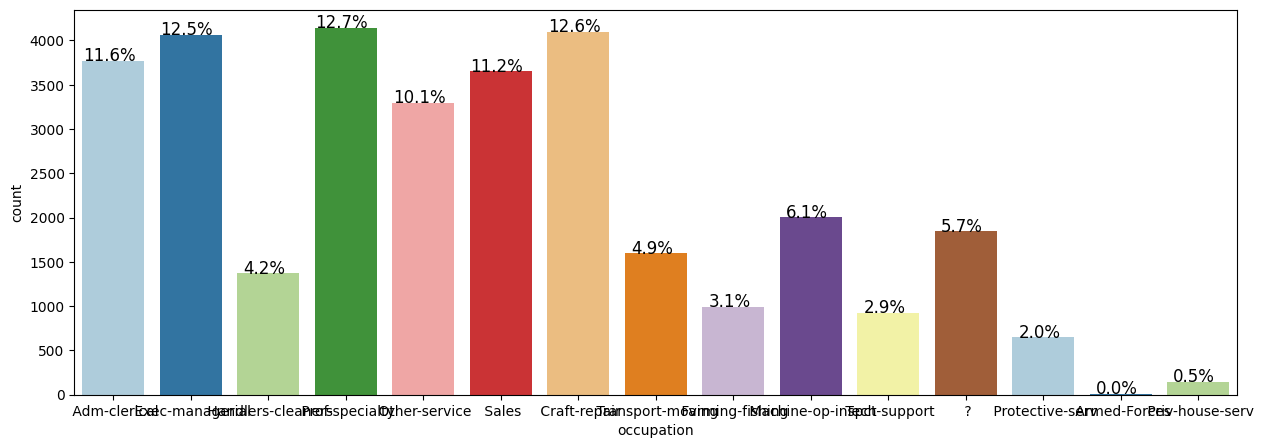

In [ ]:
perc_on_bar("occupation")

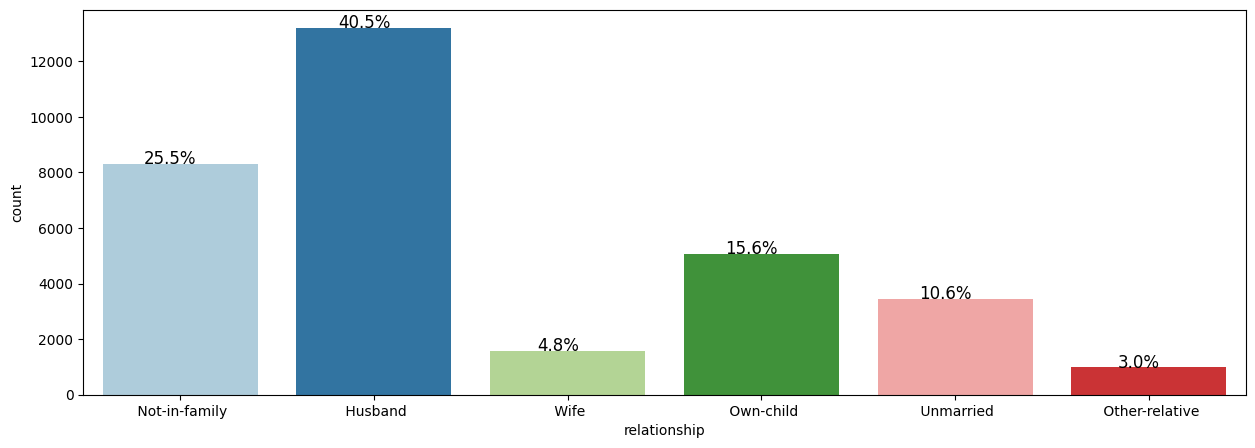

In [ ]:
perc_on_bar("relationship")

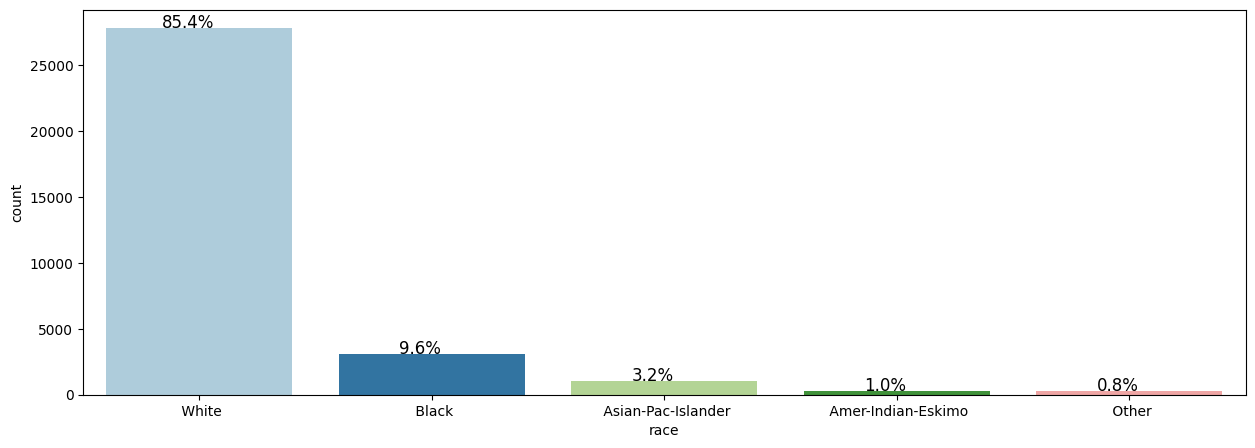

In [ ]:
perc_on_bar("race")

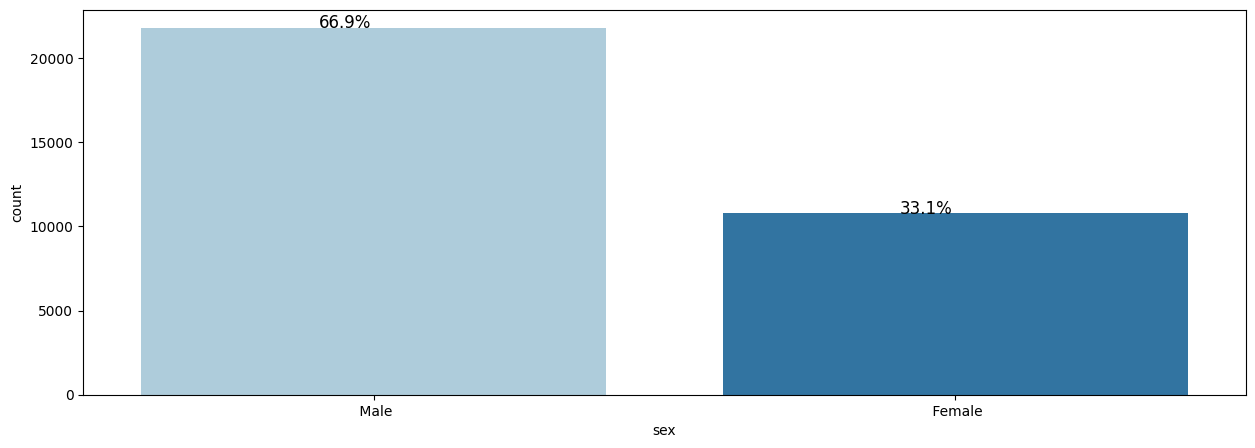

In [ ]:
perc_on_bar("sex")

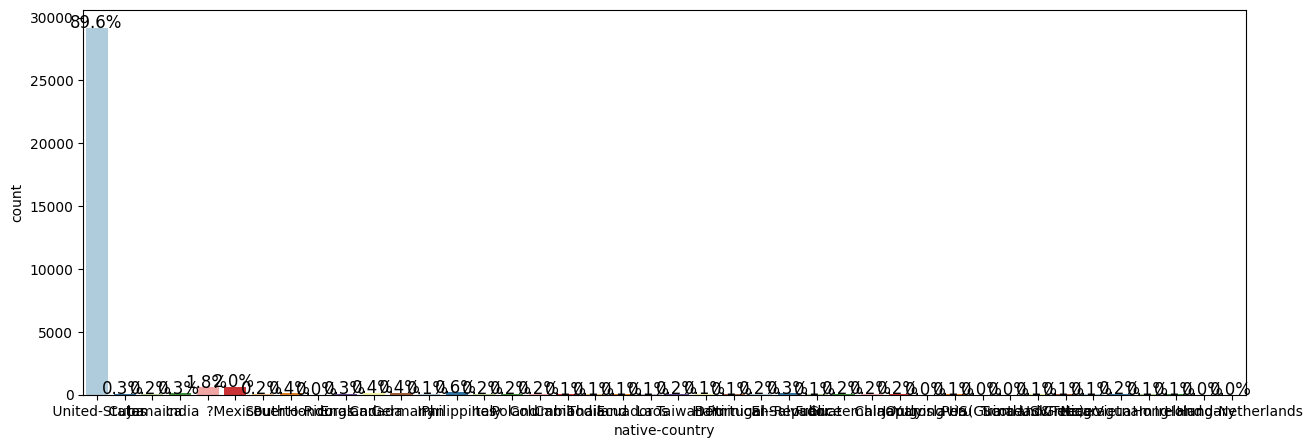

In [ ]:
perc_on_bar("native-country")

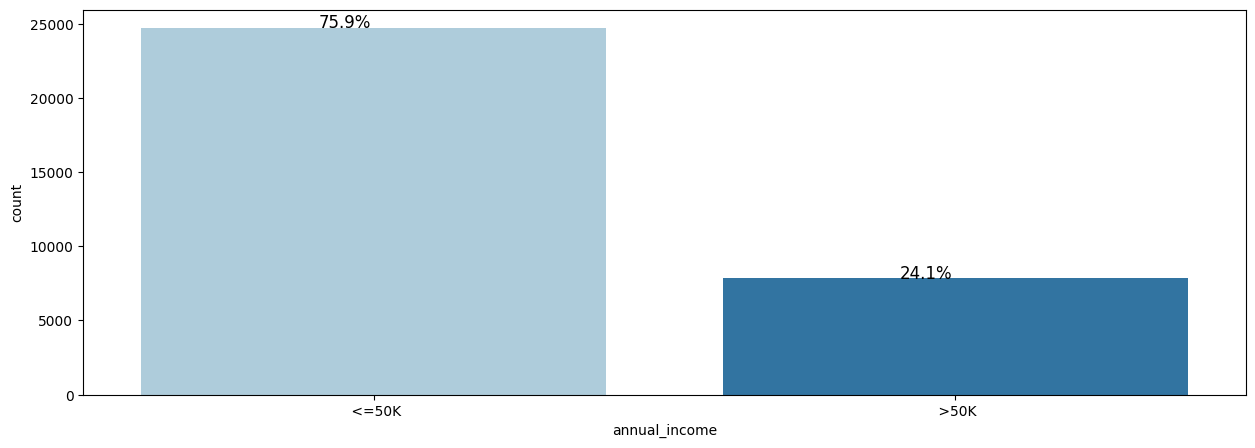

In [ ]:
perc_on_bar("annual_income")

In [ ]:
#Checking for NA values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [ ]:
#Replace missing values with "NA"
data_filled = data.fillna('NA')


In [ ]:
#Removing all rows that contain NA
data_cleaned = data.dropna()
data= data_cleaned

In [ ]:
#Checking for NA values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [ ]:
#Checking Shape of Dataset
data.shape

(32561, 15)

In [ ]:
#Removing Whitespaces from the columns
data.columns = data.columns.str.replace(" ","")
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
data.drop(columns=["fnlwgt"],axis=1,inplace=True)

## **Data Visualization**

Text(0, 0.5, 'Count of Categories')

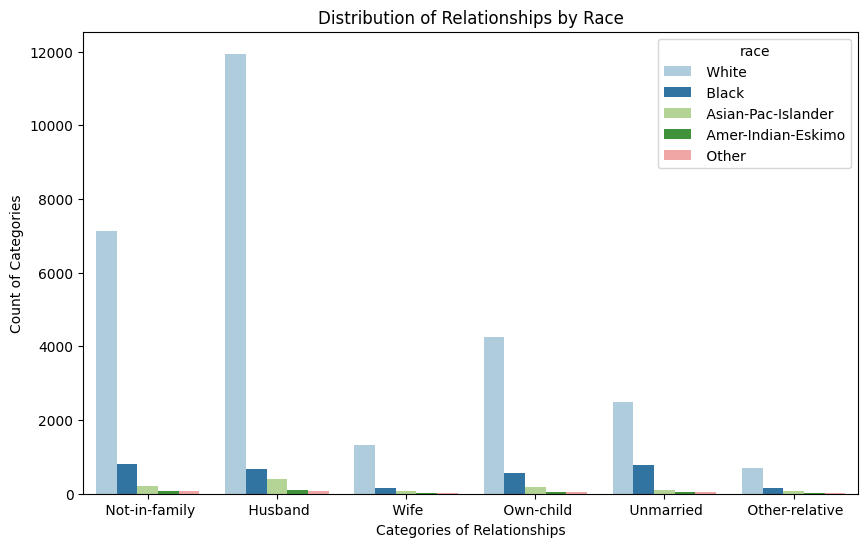

In [ ]:
#Create Bar Plot
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="relationship",hue="race",palette="Paired",dodge=True)
#PLot titles and Labels
plt.title("Distribution of Relationships by Race")
plt.xlabel("Categories of Relationships")
plt.ylabel("Count of Categories")

Text(0, 0.5, 'Count of Categories')

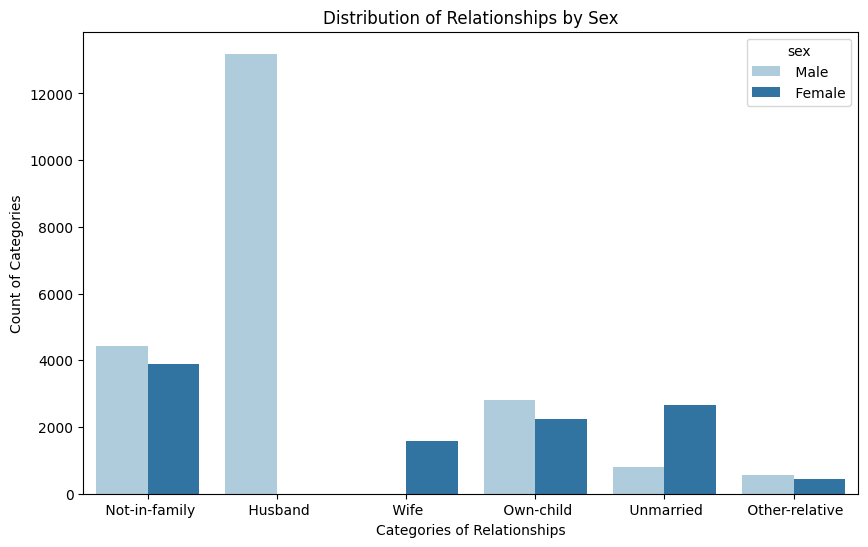

In [ ]:
#Create Bar Plot
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="relationship",hue="sex",palette="Paired",dodge=True)
#PLot titles and Labels
plt.title("Distribution of Relationships by Sex")
plt.xlabel("Categories of Relationships")
plt.ylabel("Count of Categories")

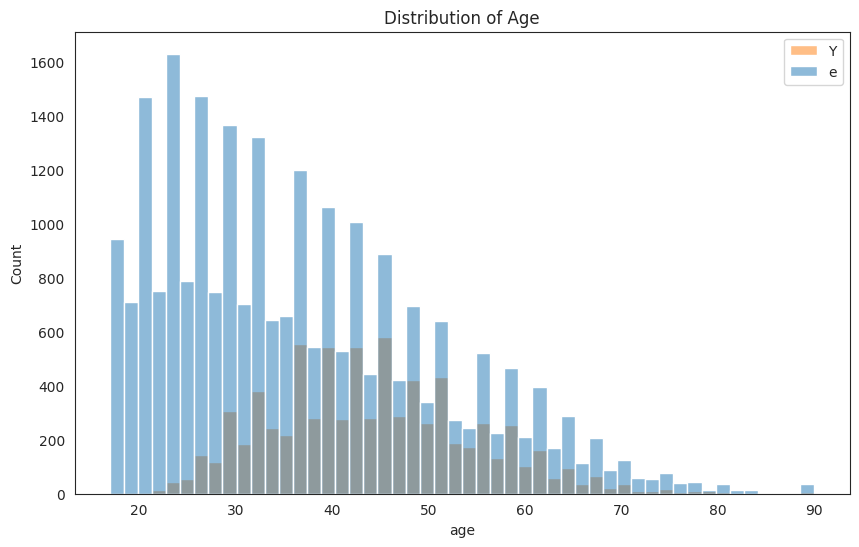

In [ ]:
#Create Histogram
plt.figure(figsize=(10,6))
# Set the style to black and white
sns.set_style("white")
sns.histplot(data= data,x='age',hue='annual_income',bins=50)
plt.title("Distribution of Age")
plt.legend("Yearly income")

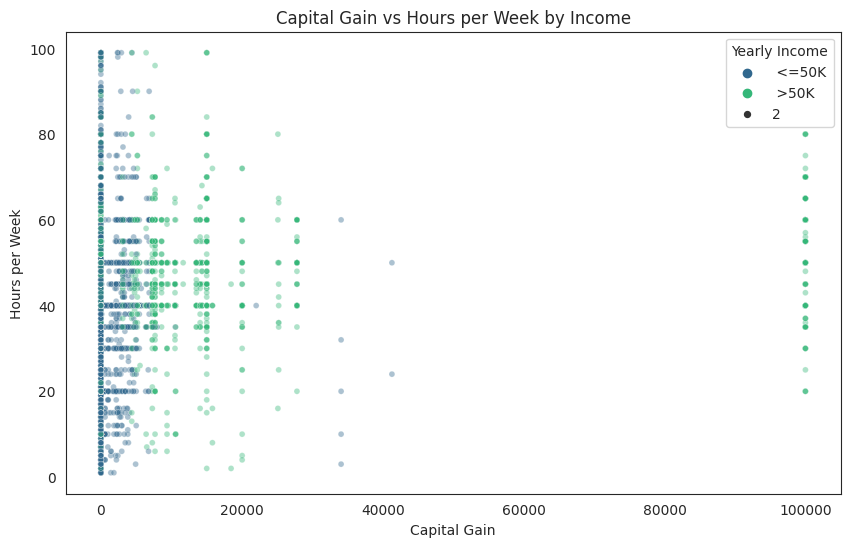

In [ ]:
#Create Scatter-Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='capital-gain', y='hours-per-week', size=2,
                alpha=0.4, hue='annual_income', palette='viridis')
# Plot title and labels
plt.title("Capital Gain vs Hours per Week by Income")
plt.xlabel("Capital Gain")
plt.ylabel("Hours per Week")
plt.legend(title="Yearly Income")
plt.show()

Text(0.5, 1.0, 'Box-Plot of age by Education and Sex')

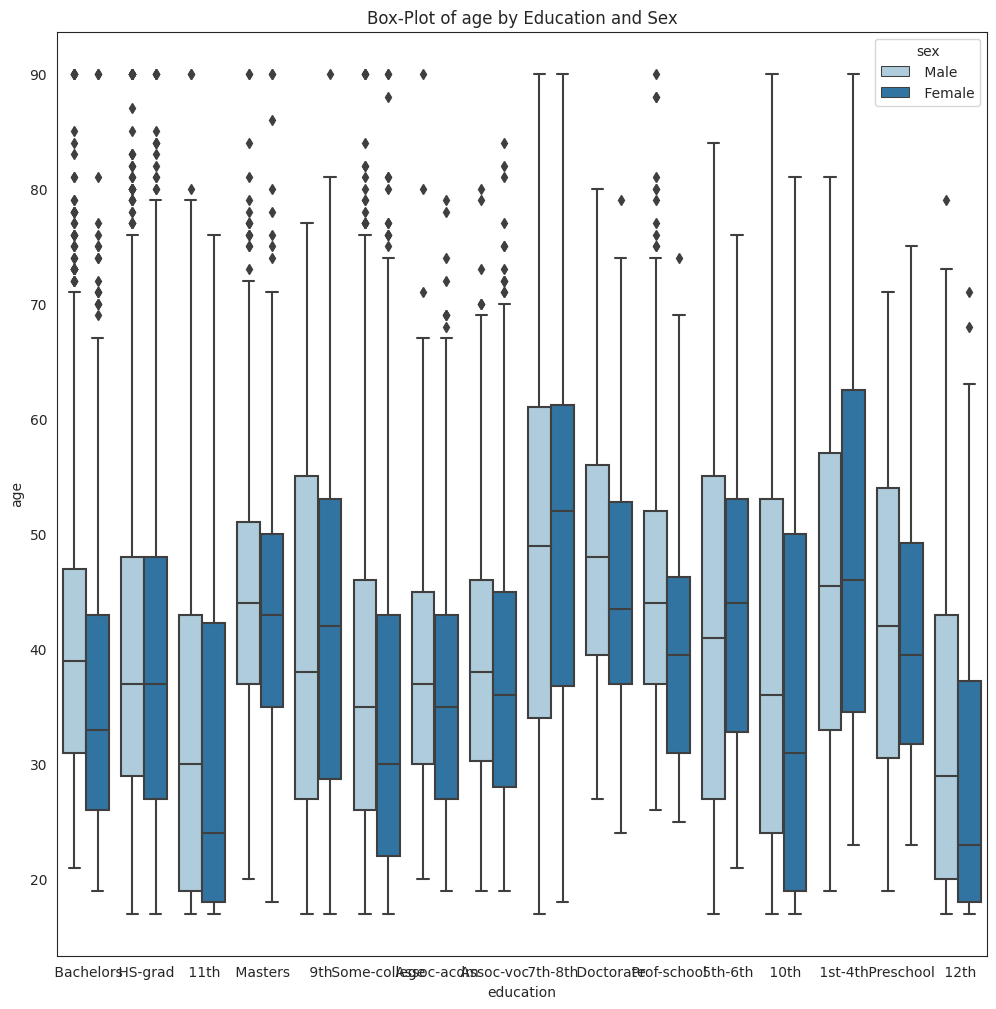

In [ ]:
#Create Box-Plot
plt.figure(figsize=(12,12))
sns.boxplot(data=data,x="education",y="age",hue="sex",palette="Paired")
plt.title("Box-Plot of age by Education and Sex")

## **Bivariate Analysis**

In [ ]:
# Remove leading spaces from values
data['annual_income'] = data['annual_income'].str.strip()

# Display unique values after removing leading spaces
print(data['annual_income'].unique())

# Mapping dictionary
mapping = {'<=50K': 0, '>50K': 1}

# Encoding the "annual_income" column
data['annual_income'] = data['annual_income'].replace(mapping)

['<=50K' '>50K']


In [ ]:
data.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


<ipython-input-47-9a1604ba1c3a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f', cmap="Spectral")


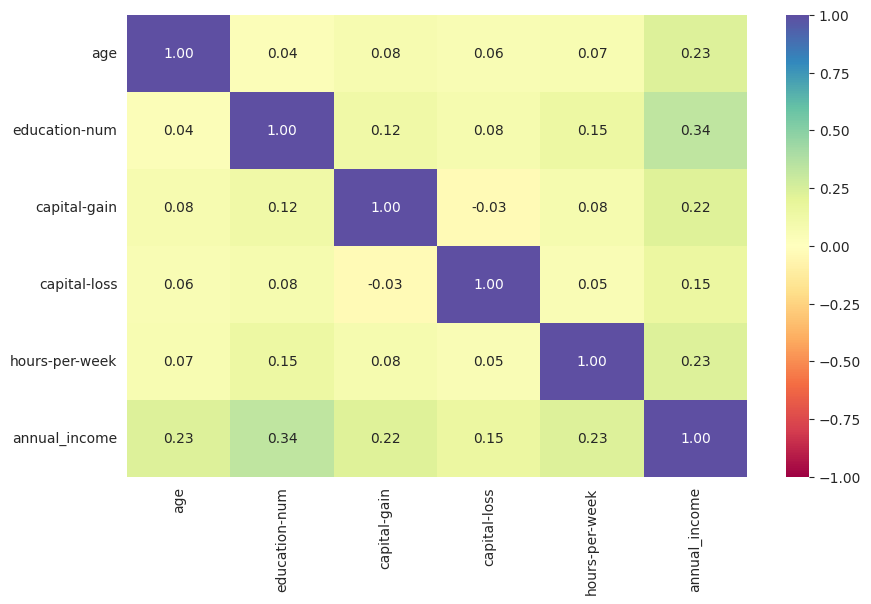

In [ ]:
#Create Heat Map w.r.t target feature ("annual_income")
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f', cmap="Spectral")
plt.show()

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x,data['annual_income'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['annual_income'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

**Annual Income vs Workclass**

annual_income          0     1    All
workclass                            
All                24720  7841  32561
 Private           17733  4963  22696
 Self-emp-not-inc   1817   724   2541
 Self-emp-inc        494   622   1116
 Local-gov          1476   617   2093
 Federal-gov         589   371    960
 State-gov           945   353   1298
 ?                  1645   191   1836
 Never-worked          7     0      7
 Without-pay          14     0     14
------------------------------------------------------------------------------------------------------------------------


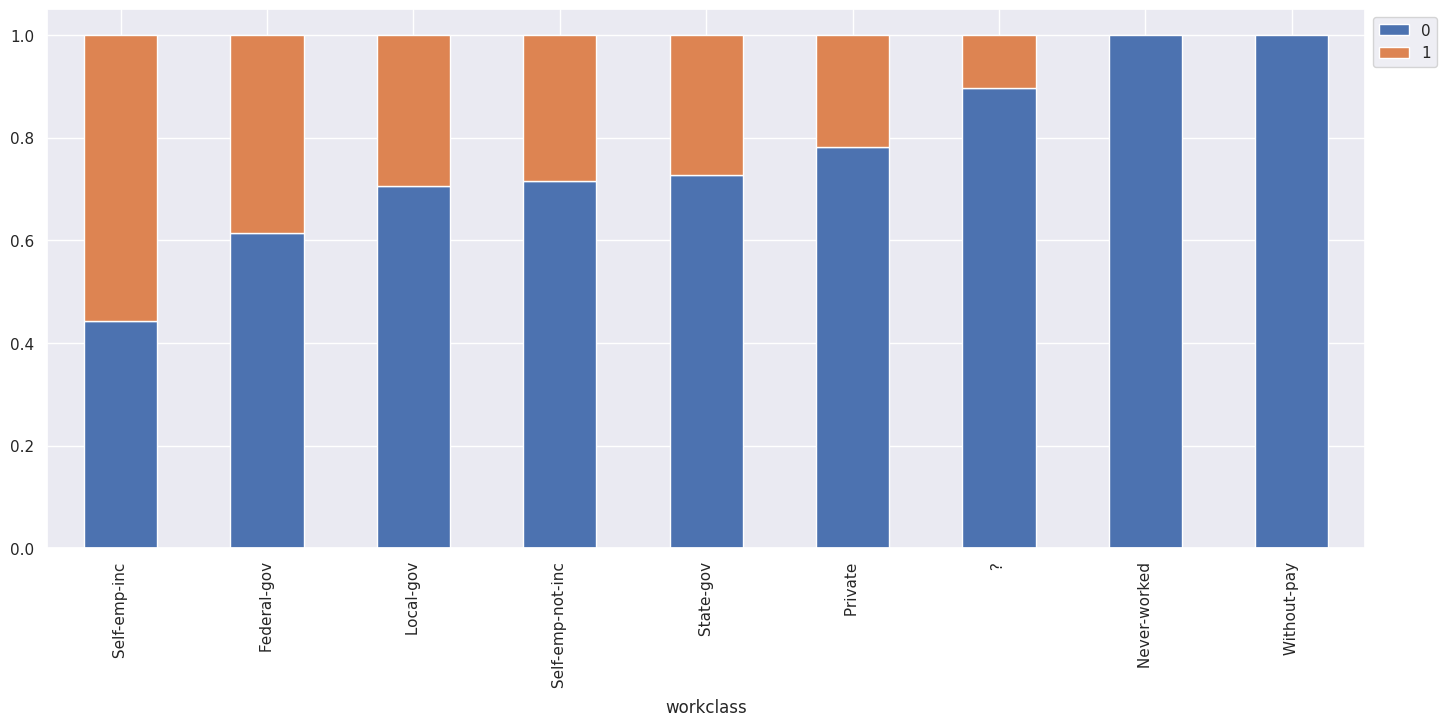

In [ ]:
stacked_plot(data['workclass'])

**Annual Income vs Education**

annual_income      0     1    All
education                        
All            24720  7841  32561
 Bachelors      3134  2221   5355
 HS-grad        8826  1675  10501
 Some-college   5904  1387   7291
 Masters         764   959   1723
 Prof-school     153   423    576
 Assoc-voc      1021   361   1382
 Doctorate       107   306    413
 Assoc-acdm      802   265   1067
 10th            871    62    933
 11th           1115    60   1175
 7th-8th         606    40    646
 12th            400    33    433
 9th             487    27    514
 5th-6th         317    16    333
 1st-4th         162     6    168
 Preschool        51     0     51
------------------------------------------------------------------------------------------------------------------------


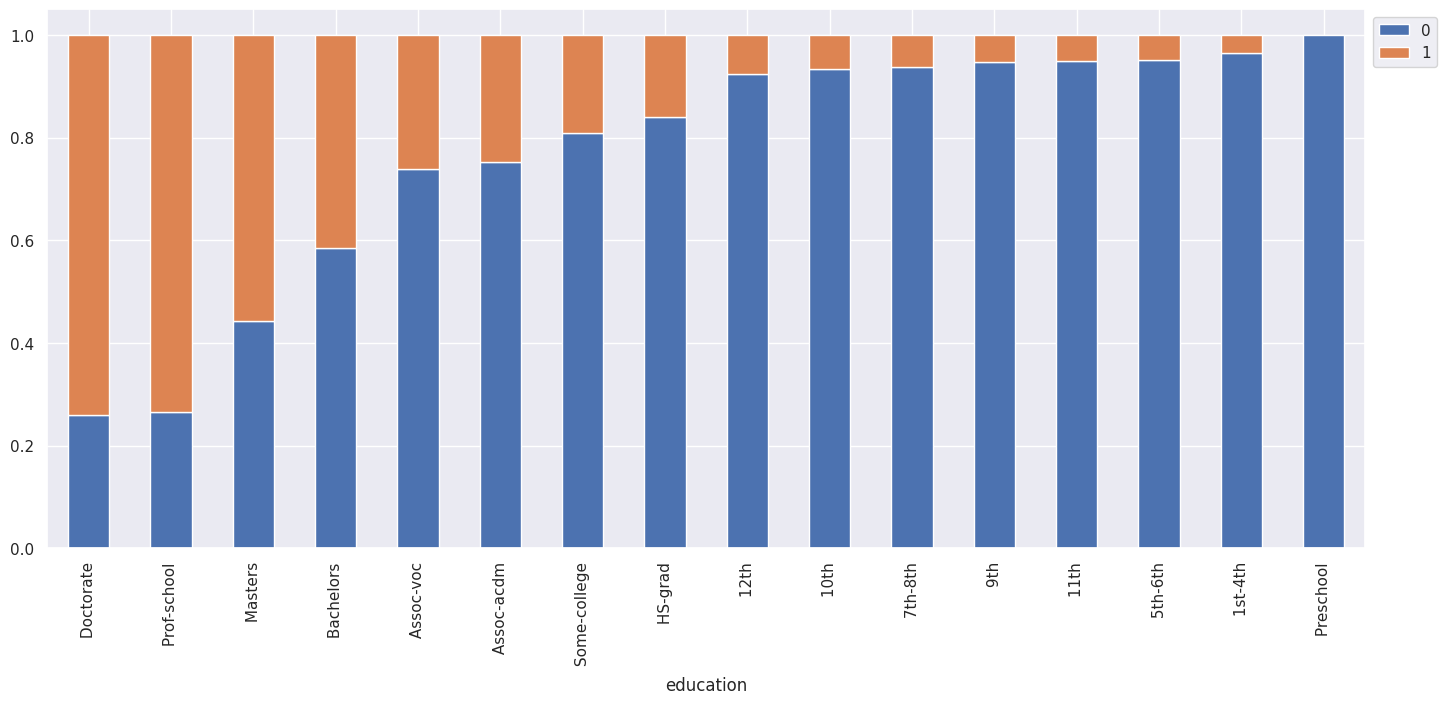

In [ ]:
stacked_plot(data['education'])

**Annual Income vs marital-status**

annual_income               0     1    All
marital-status                            
All                     24720  7841  32561
 Married-civ-spouse      8284  6692  14976
 Never-married          10192   491  10683
 Divorced                3980   463   4443
 Widowed                  908    85    993
 Separated                959    66   1025
 Married-spouse-absent    384    34    418
 Married-AF-spouse         13    10     23
------------------------------------------------------------------------------------------------------------------------


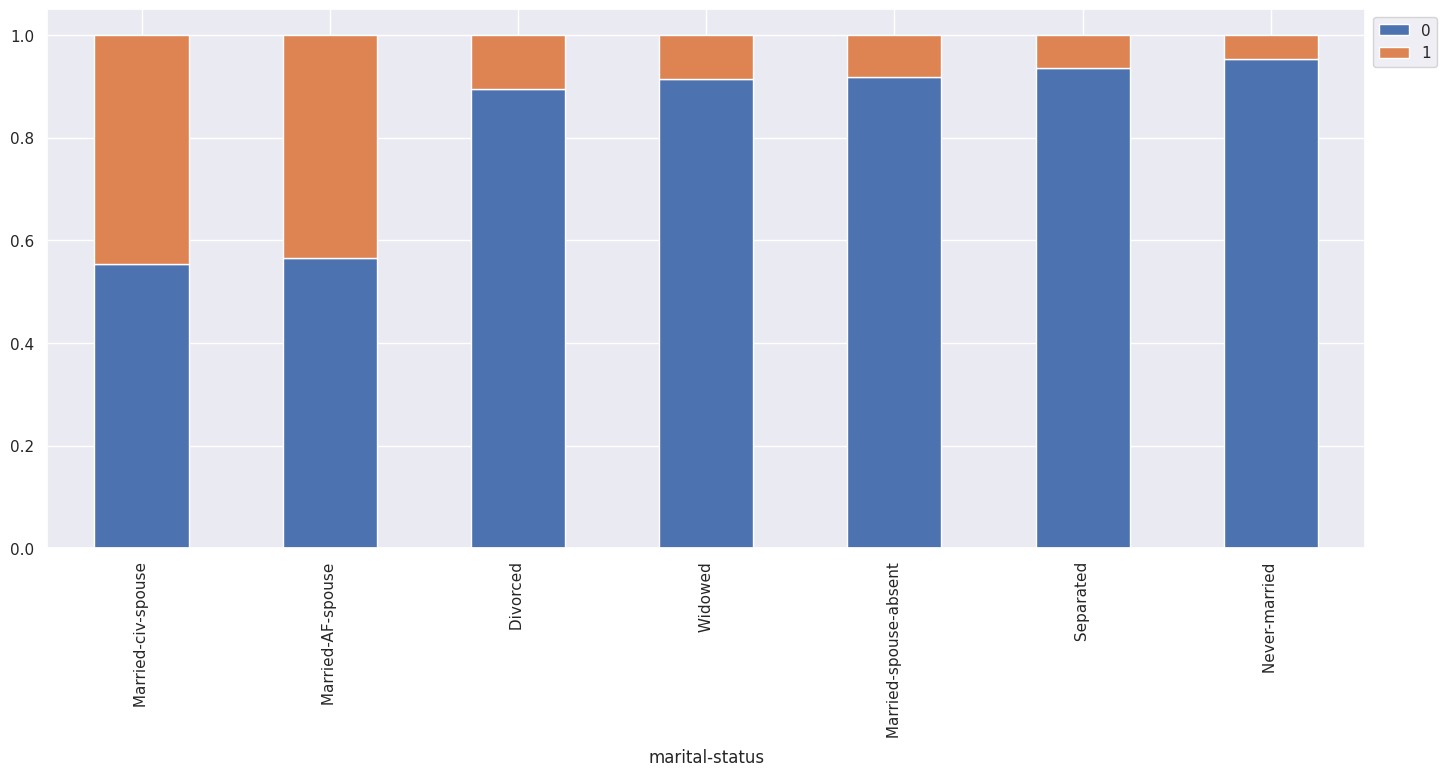

In [ ]:
stacked_plot(data['marital-status'])

**Annual Income vs Occupation**

annual_income           0     1    All
occupation                            
All                 24720  7841  32561
 Exec-managerial     2098  1968   4066
 Prof-specialty      2281  1859   4140
 Sales               2667   983   3650
 Craft-repair        3170   929   4099
 Adm-clerical        3263   507   3770
 Transport-moving    1277   320   1597
 Tech-support         645   283    928
 Machine-op-inspct   1752   250   2002
 Protective-serv      438   211    649
 ?                   1652   191   1843
 Other-service       3158   137   3295
 Farming-fishing      879   115    994
 Handlers-cleaners   1284    86   1370
 Armed-Forces           8     1      9
 Priv-house-serv      148     1    149
------------------------------------------------------------------------------------------------------------------------


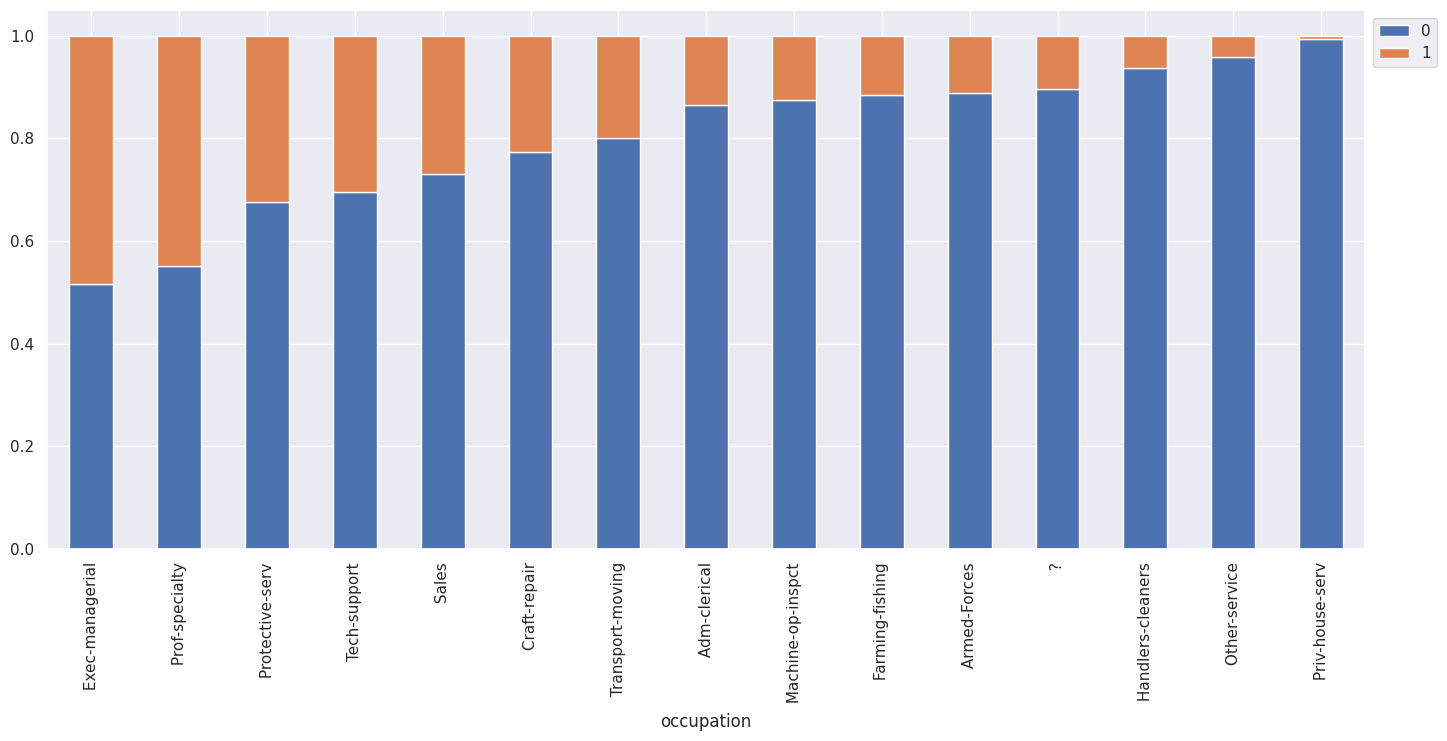

In [ ]:
stacked_plot(data['occupation'])

**Annual Income vs relationship**

annual_income        0     1    All
relationship                       
All              24720  7841  32561
 Husband          7275  5918  13193
 Not-in-family    7449   856   8305
 Wife              823   745   1568
 Unmarried        3228   218   3446
 Own-child        5001    67   5068
 Other-relative    944    37    981
------------------------------------------------------------------------------------------------------------------------


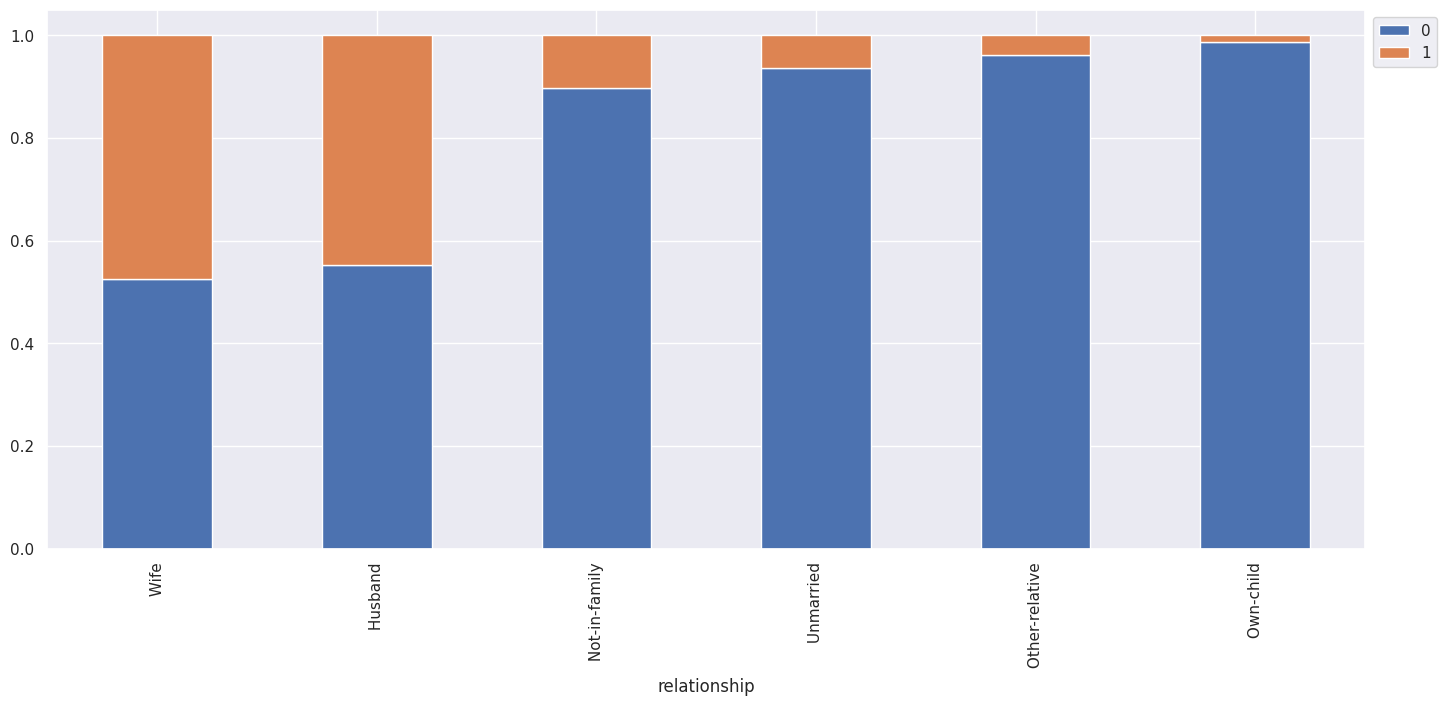

In [ ]:
stacked_plot(data['relationship'])

**Annual Income vs sex**

annual_income      0     1    All
sex                              
All            24720  7841  32561
 Male          15128  6662  21790
 Female         9592  1179  10771
------------------------------------------------------------------------------------------------------------------------


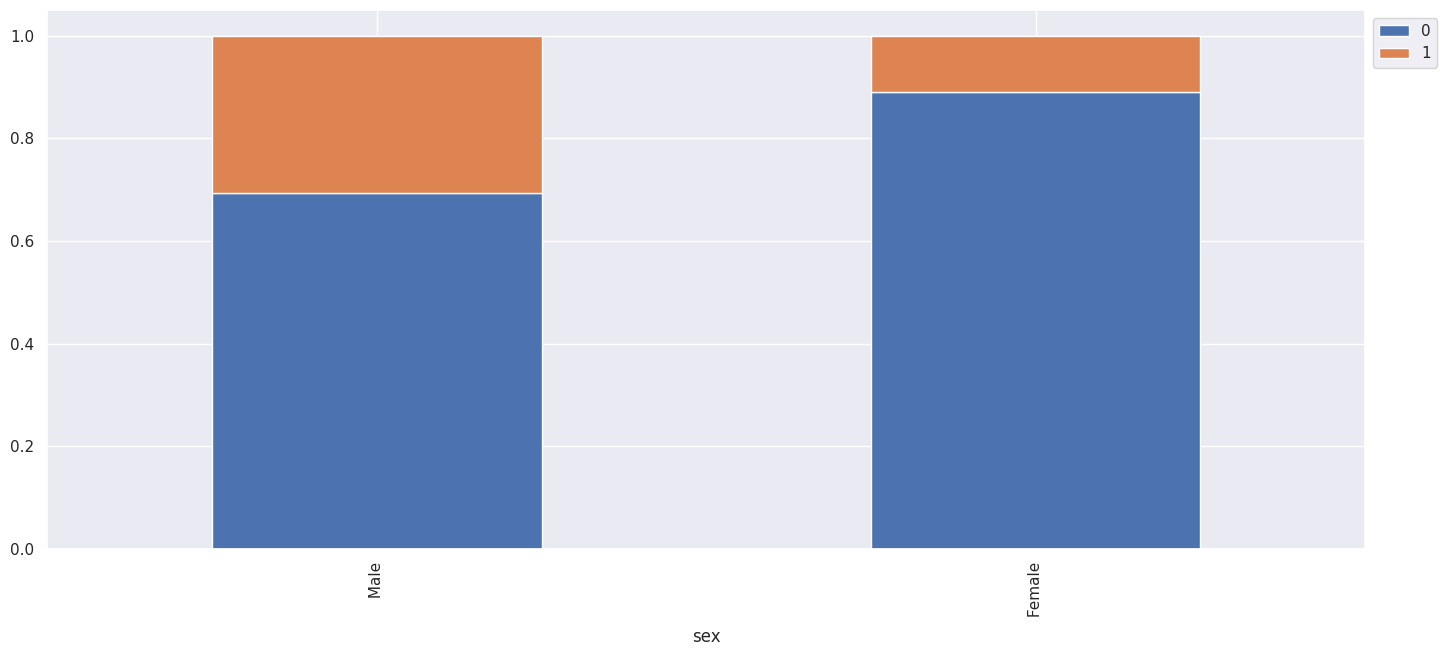

In [ ]:
stacked_plot(data['sex'])

annual_income            0     1    All
race                                   
All                  24720  7841  32561
 White               20699  7117  27816
 Black                2737   387   3124
 Asian-Pac-Islander    763   276   1039
 Amer-Indian-Eskimo    275    36    311
 Other                 246    25    271
------------------------------------------------------------------------------------------------------------------------


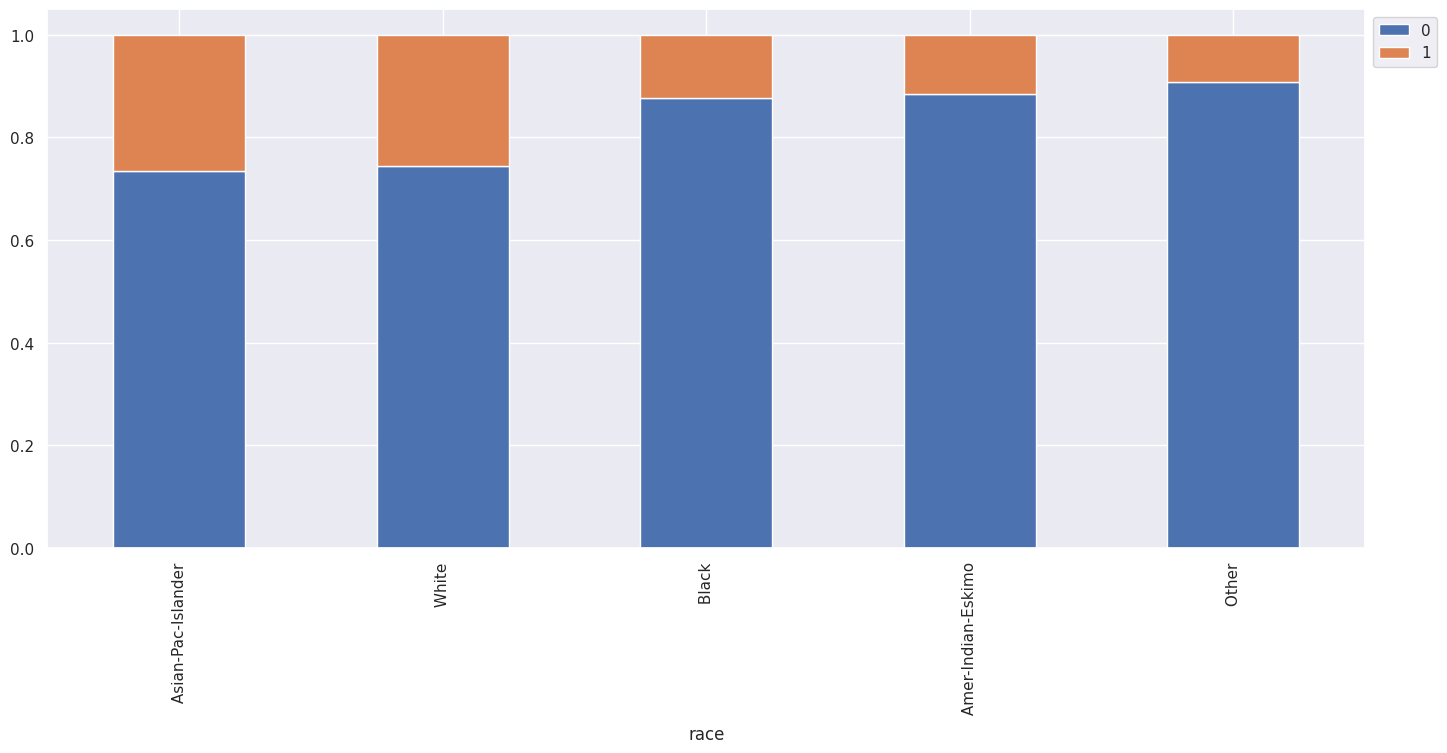

In [ ]:
stacked_plot(data['race'])

annual_income                    0     1    All
native-country                                 
All                          24720  7841  32561
 United-States               21999  7171  29170
 ?                             437   146    583
 Philippines                   137    61    198
 Germany                        93    44    137
 India                          60    40    100
 Canada                         82    39    121
 Mexico                        610    33    643
 England                        60    30     90
 Cuba                           70    25     95
 Italy                          48    25     73
 Japan                          38    24     62
 China                          55    20     75
 Taiwan                         31    20     51
 Iran                           25    18     43
 South                          64    16     80
 France                         17    12     29
 Puerto-Rico                   102    12    114
 Poland                         48    12

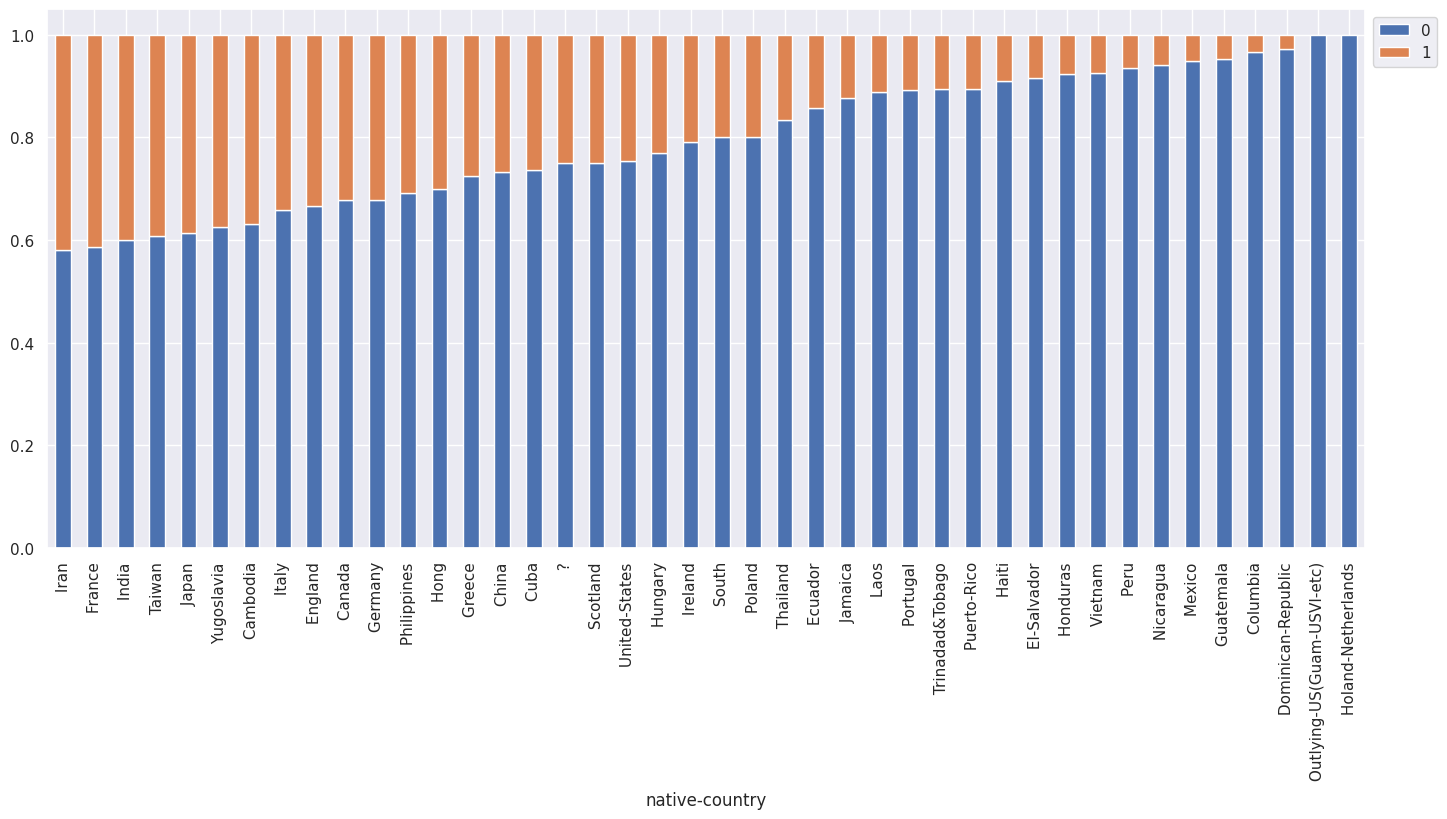

In [ ]:
stacked_plot(data['native-country'])

In [ ]:
### Function to plot distributions and Boxplots of Annual Income
def plot_distribution(x,target='annual_income'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Annual income >50k')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Annual income <=50k')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')

    axs[1,0].set_title('Boxplot w.r.t annual income')
    sns.boxplot(x=data[target],y=data[x],ax=axs[1,0],palette='gist_rainbow')

    axs[1,1].set_title('Boxplot w.r.t annual income - Without outliers')
    sns.boxplot(x=data[target],y=data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

<ipython-input-57-083a02f0cb71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
<ipython-input-57-083a02f0cb71>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')


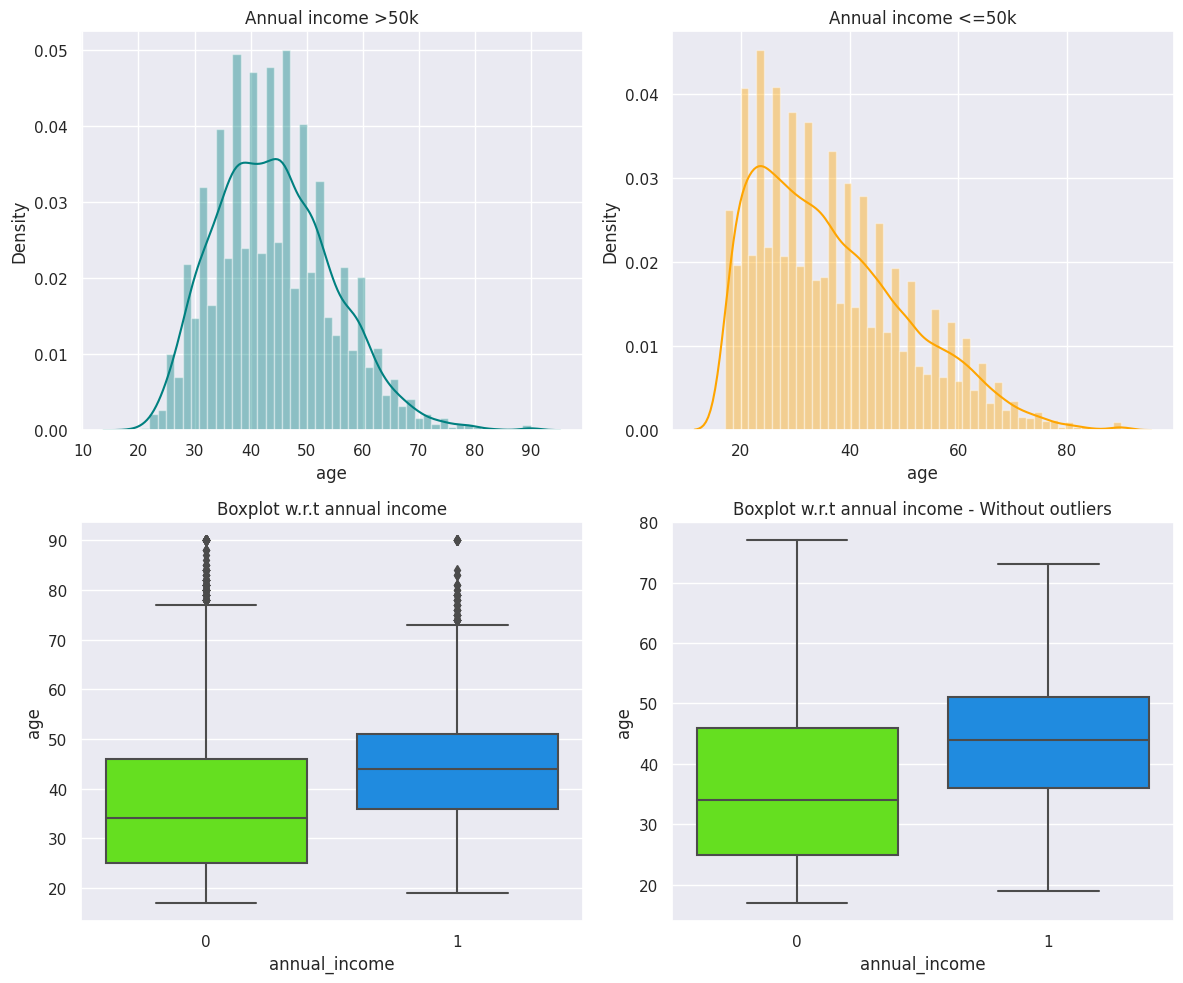

In [ ]:
plot_distribution('age')

<ipython-input-57-083a02f0cb71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
<ipython-input-57-083a02f0cb71>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')


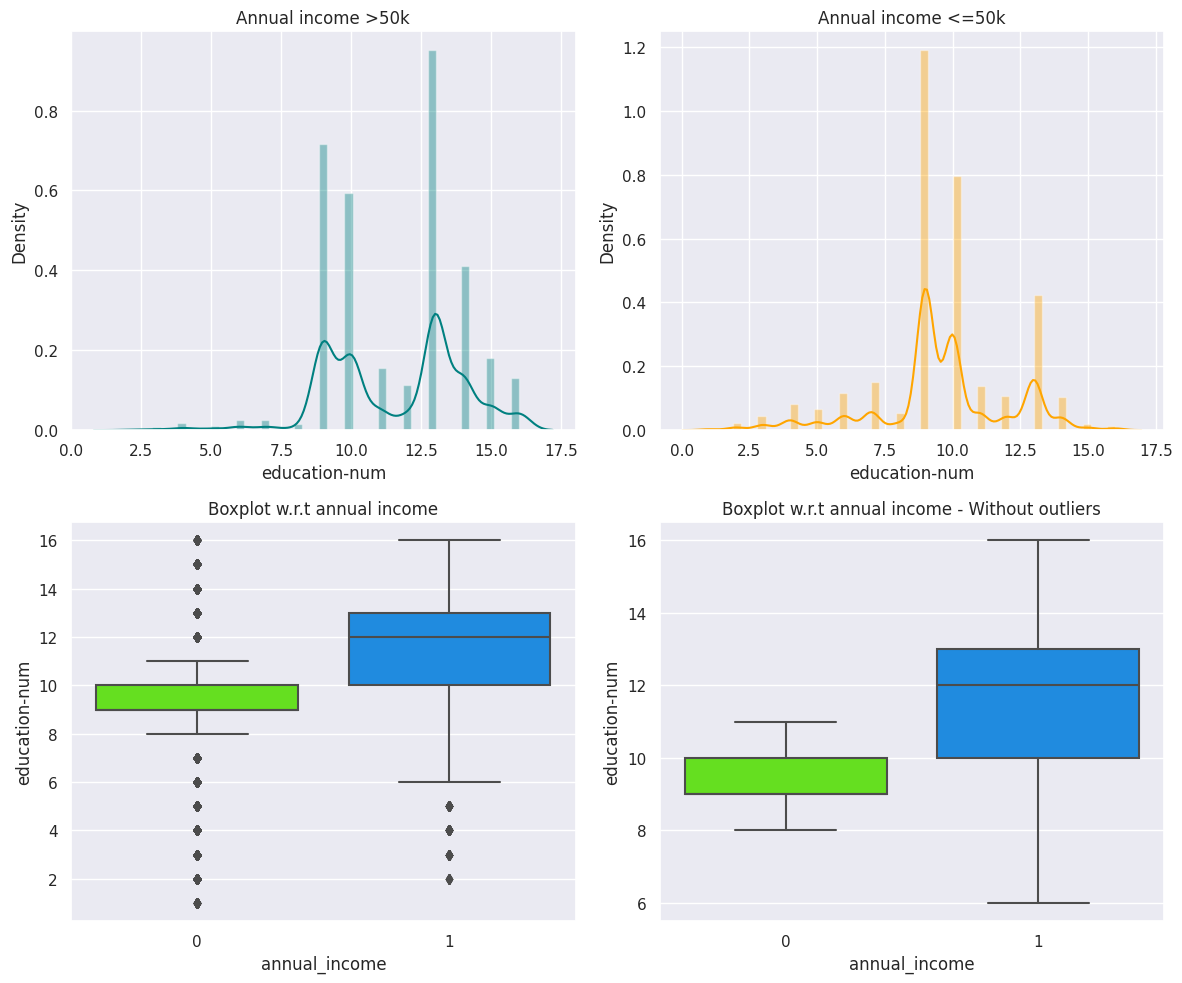

In [ ]:
plot_distribution('education-num')

<ipython-input-57-083a02f0cb71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
<ipython-input-57-083a02f0cb71>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')


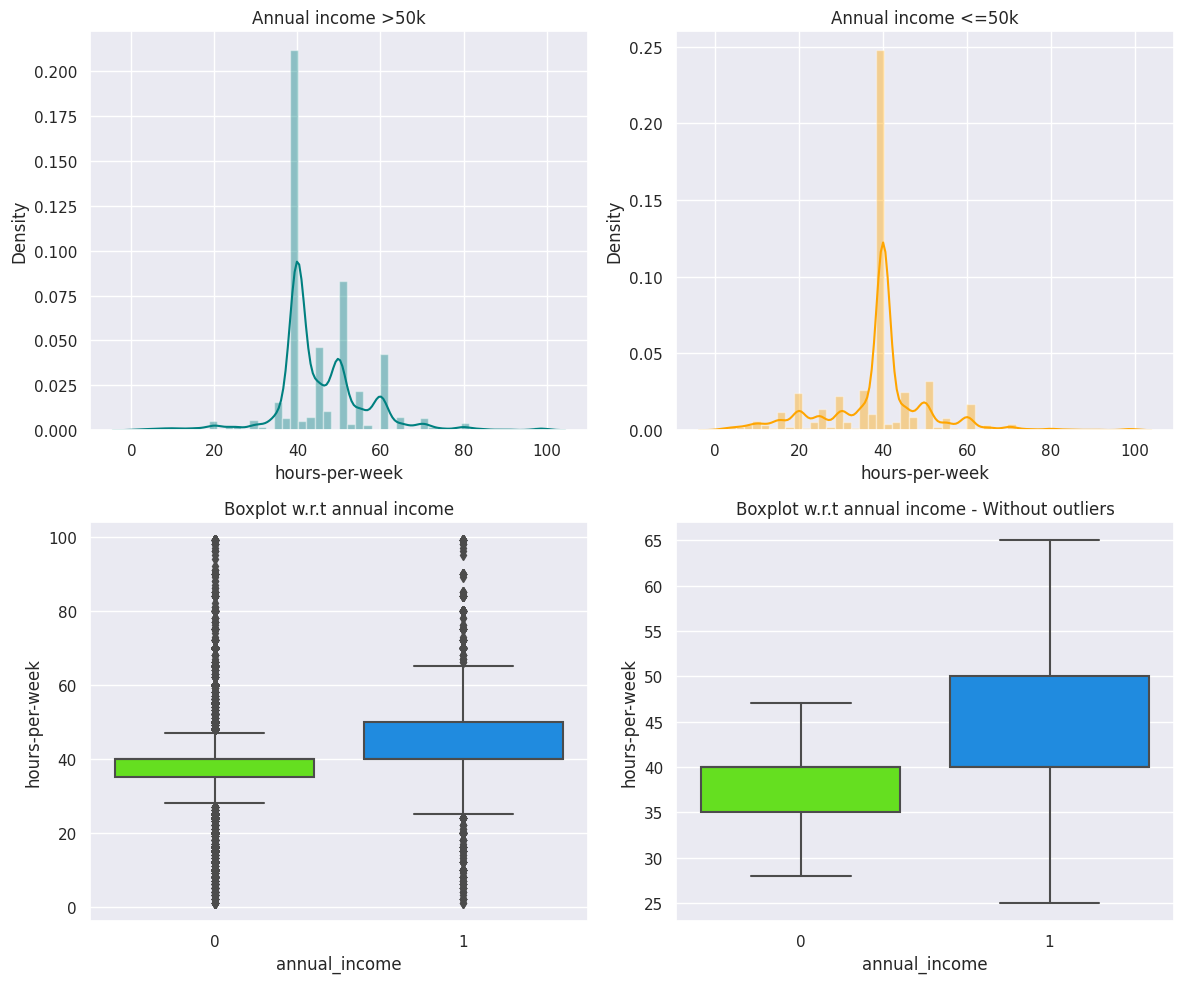

In [ ]:
plot_distribution('hours-per-week')

<ipython-input-57-083a02f0cb71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
<ipython-input-57-083a02f0cb71>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')


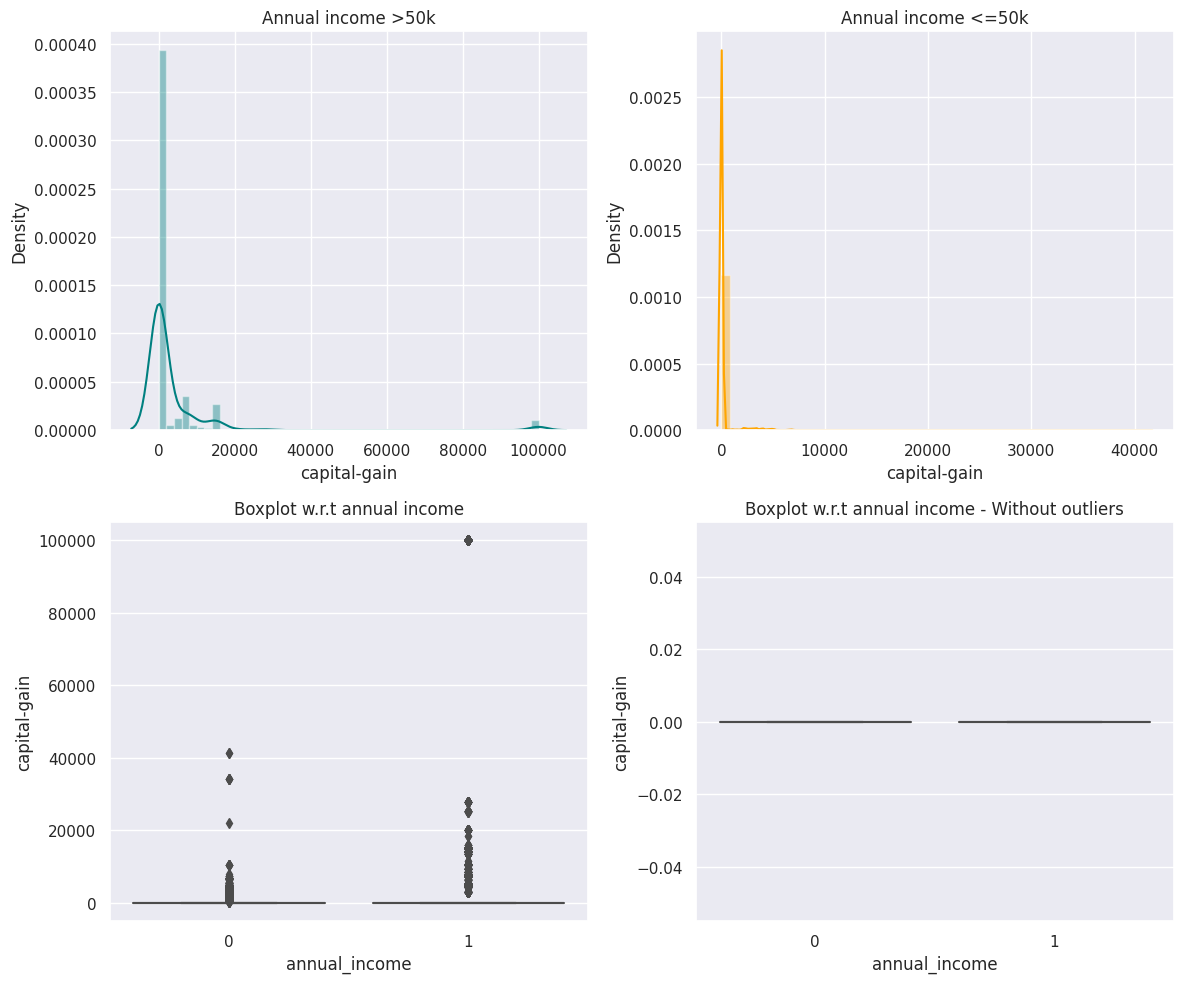

In [ ]:
plot_distribution('capital-gain')

<ipython-input-57-083a02f0cb71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
<ipython-input-57-083a02f0cb71>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')


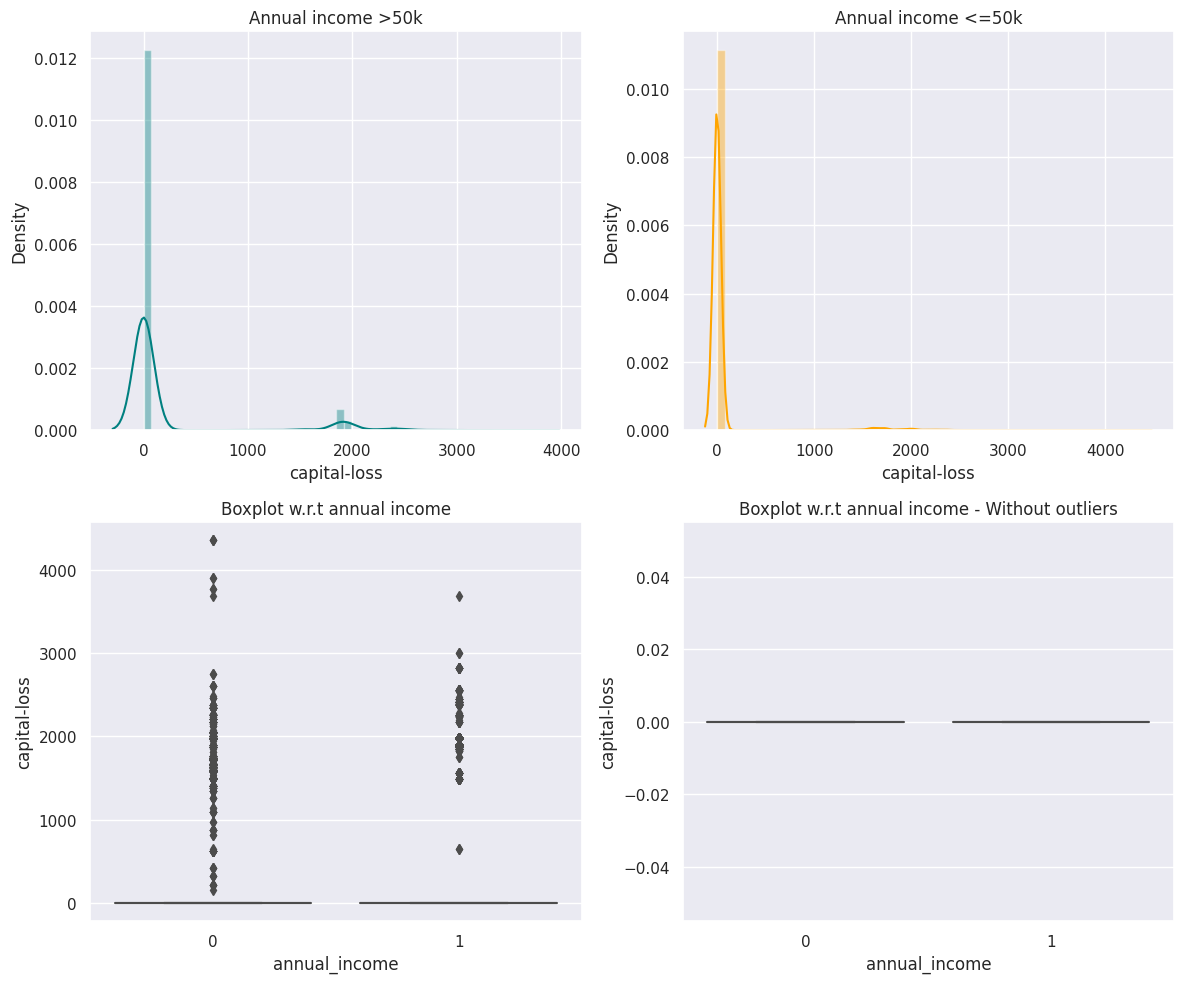

In [ ]:
plot_distribution('capital-loss')

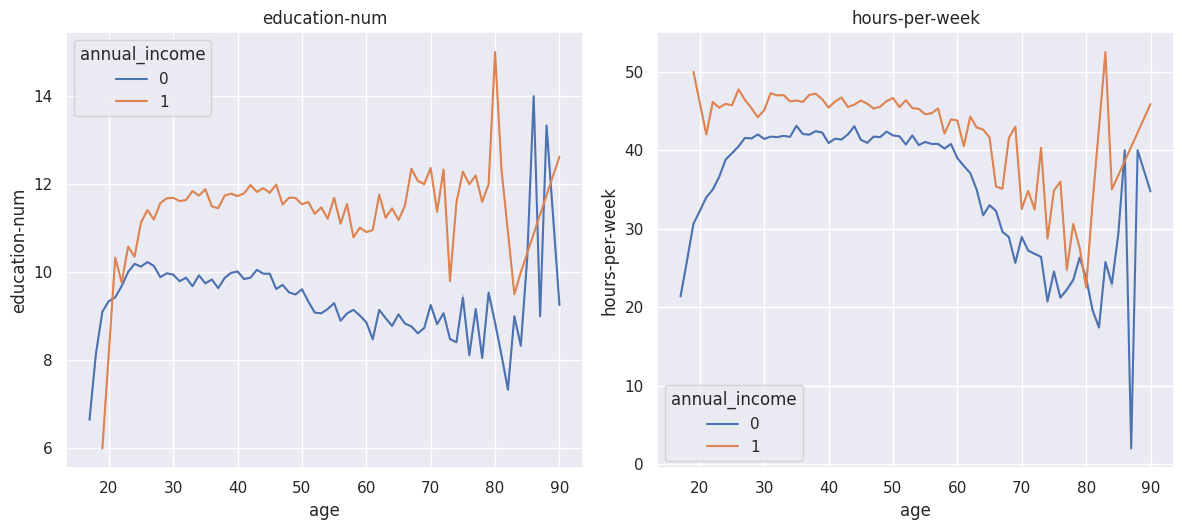

In [ ]:
#Creating Line Plot between datasets to see correlation between them
cols = data[['education-num','hours-per-week']].columns.tolist()
plt.figure(figsize=(12,10))
for i, variable in enumerate(cols):
                     plt.subplot(2,2,i+1)
                     sns.lineplot(x=data['age'],y=data[variable],hue=data['annual_income'],errorbar=('ci', 0))
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [ ]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

<ipython-input-64-5c64e4e6cf0d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
<ipython-input-64-5c64e4e6cf0d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [ ]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

age                0.439176
education-num      3.679248
capital-gain       8.328983
capital-loss       4.665090
hours-per-week    27.664998
annual_income     24.080956
dtype: float64

# **Data Preparation**

In [ ]:
#Creating a Copy of Dataset
data1 = data.copy()

In [ ]:
data1 = data1.replace(' ?',np.nan)

Checking for NA

In [ ]:
data1.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

Label Encoding the categorical values so that they have a numerical significance

In [ ]:
# we need to pass numerical values for each catergorical column for KNN imputation so we will label encode them
sex = {' Male':1,' Female':0}
data1['sex'] = data1['sex'].map(sex)
# .astype('Int32')
workclass = {" Private" : 2,
 " Self-emp-not-inc" : 4,
 " Local-gov": 5,
 " State-gov" : 3 ,
 " Self-emp-inc" : 7,
 " Federal-gov" :  6,
 " Without-pay" : 0,
 " Never-worked" :1}
data1['workclass'] = data['workclass'].map(workclass)

education= {' Bachelors':12, ' HS-grad':8, ' 11th':6, ' Masters':13, ' 9th':4,
       ' Some-college':9, ' Assoc-acdm':10, ' Assoc-voc':11, ' 7th-8th':3,
       ' Doctorate':15, ' Prof-school':14, ' 5th-6th':2, ' 10th':5, ' 1st-4th':1,
       ' Preschool':0, ' 12th':7}
data1['education'] = data1['education'].map(education)
# .astype('Int32')

marital_status = {' Never-married':0, ' Married-civ-spouse':6, ' Divorced':4,
       ' Married-spouse-absent':2, ' Separated':1, ' Married-AF-spouse':5,
       ' Widowed':3}
data1['marital-status'] = data1['marital-status'].map(marital_status)
# .astype('Int32')

occupation= {' Adm-clerical':6, ' Exec-managerial':13, ' Handlers-cleaners':2,
       ' Prof-specialty':12, ' Other-service':1, ' Sales':9, ' Craft-repair':8,
       ' Transport-moving':7, ' Farming-fishing':4, ' Machine-op-inspct':5,
       ' Tech-support':10, ' Protective-serv':11, ' Armed-Forces':3,
       ' Priv-house-serv':0}
data1['occupation']= data1['occupation'].map(occupation)

relationship = {' Not-in-family':3, ' Husband':4, ' Wife':5, ' Own-child':0, ' Unmarried':2,
       ' Other-relative':1}
data1['relationship'] = data1['relationship'].map(relationship)

race = {' White' :3, ' Black':2, ' Asian-Pac-Islander':4, ' Amer-Indian-Eskimo':1,
       ' Other':0}
data1['race'] = data1['race'].map(race)

#native-country = {}
#data1['native-country'] = data1['native-country'].map(native-country)


In [ ]:
data1.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,3.0,12,13,0,6.0,3,3,1,2174,0,40,United-States,0
1,50,4.0,12,13,6,13.0,4,3,1,0,0,13,United-States,0


In [ ]:
data1.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64



*   Values have been encoded.



In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
#Dividing the dataset with trainable features(X) and Target Features(Y)
X = data1.drop(['annual_income','native-country'],axis=1)    #Trainable Features
y =  data1['annual_income']   #Target Features

In [ ]:
X.head(2)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,3.0,12,13,0,6.0,3,3,1,2174,0,40
1,50,4.0,12,13,6,13.0,4,3,1,0,0,13


In [ ]:
y.head(2)

0    0
1    0
Name: annual_income, dtype: int64

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(22792, 12) (9769, 12)


In [ ]:
X.dtypes

age                 int64
workclass         float64
education           int64
education-num       int64
marital-status      int64
occupation        float64
relationship        int64
race                int64
sex                 int64
capital-gain        int64
capital-loss        int64
hours-per-week      int64
dtype: object

In [ ]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [ ]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64
------------------------------
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64


In [ ]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [ ]:
inverse_mapping(sex,'sex')
inverse_mapping(workclass,'workclass')
inverse_mapping(education,'education')
inverse_mapping(marital_status,'marital-status')
inverse_mapping(relationship,'relationship')
inverse_mapping(occupation,'occupation')
inverse_mapping(race,'race')

In [ ]:
#Checkig for Training data
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

 Private             16484
 Self-emp-not-inc     1913
 Local-gov            1518
 State-gov            1403
 Self-emp-inc          785
 Federal-gov           674
 Without-pay            11
 Never-worked            4
Name: workclass, dtype: int64
******************************
 HS-grad         7355
 Some-college    5114
 Bachelors       3788
 Masters         1179
 Assoc-voc        979
 11th             810
 Assoc-acdm       745
 10th             660
 7th-8th          442
 Prof-school      383
 9th              363
 Doctorate        302
 12th             292
 5th-6th          218
 1st-4th          122
 Preschool         40
Name: education, dtype: int64
******************************
 Married-civ-spouse       10476
 Never-married             7514
 Divorced                  3090
 Separated                  730
 Widowed                    671
 Married-spouse-absent      292
 Married-AF-spouse           19
Name: marital-status, dtype: int64
******************************
 Craft-repair       

In [ ]:
#checking for test data
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

 Private             7102
 Self-emp-not-inc     828
 Local-gov            608
 State-gov            607
 Self-emp-inc         331
 Federal-gov          287
 Never-worked           3
 Without-pay            3
Name: workclass, dtype: int64
******************************
 HS-grad         3146
 Some-college    2177
 Bachelors       1567
 Masters          544
 Assoc-voc        403
 11th             365
 Assoc-acdm       322
 10th             273
 7th-8th          204
 Prof-school      193
 9th              151
 12th             141
 5th-6th          115
 Doctorate        111
 1st-4th           46
 Preschool         11
Name: education, dtype: int64
******************************
 Married-civ-spouse       4500
 Never-married            3169
 Divorced                 1353
 Widowed                   322
 Separated                 295
 Married-spouse-absent     126
 Married-AF-spouse           4
Name: marital-status, dtype: int64
******************************
 Craft-repair         1268
 Prof-sp

We have received our origiginal Categorical/object data

**Encoding Categoical Features**

In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(22792, 56) (9769, 56)


In [ ]:
X_train.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,21.0,10.0,0.0,0.0,20.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,32.0,13.0,0.0,0.0,40.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,40.0,10.0,0.0,0.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,62.0,4.0,0.0,0.0,35.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,40.0,8.0,0.0,0.0,40.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


Now we have 56 columns , which were 12 before encoding

# **Building Model**



# **1.   Linear Regression Model**




In [ ]:
#Fitting Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predict the values on the train set and find the error in prediction
y_train_pred = model.predict(X_train)
train_error = y_train - y_train_pred

In [ ]:
print(train_error)

30743    0.099467
21386   -0.303702
13266   -0.269134
31941    0.207576
15241   -0.057080
           ...   
6903    -0.595227
4145     0.388446
977      0.425260
29929   -0.591504
25952   -0.337416
Name: annual_income, Length: 22792, dtype: float64


In [ ]:
#Find the root-mean-square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 0.3392293885138039


In [ ]:
#Predictions on test set
y_test_pred = model.predict(X_test)
test_error = y_test - y_test_pred
print(test_error)

12877   -0.019660
1841    -0.413130
11390    0.106177
21416   -0.338478
5308     0.011616
           ...   
16415   -0.350961
14679    0.044017
2908     0.149582
18259    0.118723
6402    -0.083393
Name: annual_income, Length: 9769, dtype: float64


In [ ]:
#Find the Test root-mean-square error (RMSE)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test Root Mean Square Error (RMSE): {rmse_test}")

Test Root Mean Square Error (RMSE): 0.34282570110870253


In [ ]:
# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Train MAE:", train_mae)
print("Train RMSE:", train_rmse)
print("Train R-squared:", train_r2)

print("\nTest MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)

Train MAE: 0.26236127346545707
Train RMSE: 0.3392293885138039
Train R-squared: 0.3705848778556865

Test MAE: 0.26516711792745107
Test RMSE: 0.34282570110870253
Test R-squared: 0.3570438297051982



## **2.   Logistic Regression**



 **First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [ ]:
#Fitting Logistic Regression Model
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
# Predict the values on the test set
y_test_pred = lr.predict(X_test)

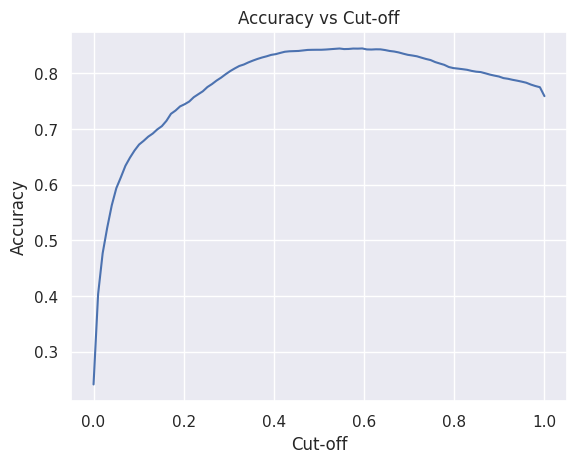

Ideal Cut-off: 0.595959595959596


In [ ]:
#Plot accuracy vs cut-off and find an ideal value for cut-off
probs = lr.predict_proba(X_test)[:, 1]
cutoffs = np.linspace(0, 1, num=100)
accuracies = [accuracy_score(y_test, probs >= cutoff) for cutoff in cutoffs]

plt.plot(cutoffs, accuracies)
plt.xlabel('Cut-off')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Cut-off')
plt.show()
ideal_cutoff = cutoffs[np.argmax(accuracies)]
print("Ideal Cut-off:", ideal_cutoff)

In [ ]:
#Build a confusion matrix and find accuracy
conf_matrix = confusion_matrix(y_test, probs >= ideal_cutoff)
accuracy = accuracy_score(y_test, probs >= ideal_cutoff)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[7057  360]
 [1154 1198]]
Accuracy: 0.8450199611014434


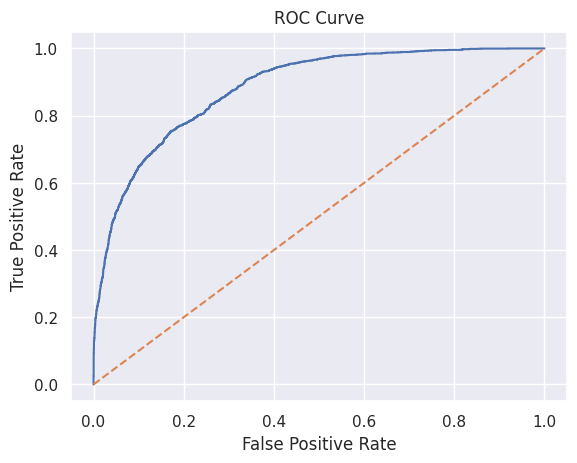

AUC (Area Under Curve): 0.8824298713013586


In [ ]:
# Plot ROC curve and find AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC (Area Under Curve):", auc)

In [ ]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(train)
    pred_test = model.predict(test)

    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)

    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)

    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))

    return score_list # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  0.844068094068094
Accuracy on test set :  0.8422561162862114
Recall on training set :  0.5951903807615231
Recall on test set :  0.5829081632653061
Precision on training set :  0.7103718199608611
Precision on test set :  0.7099948213360953


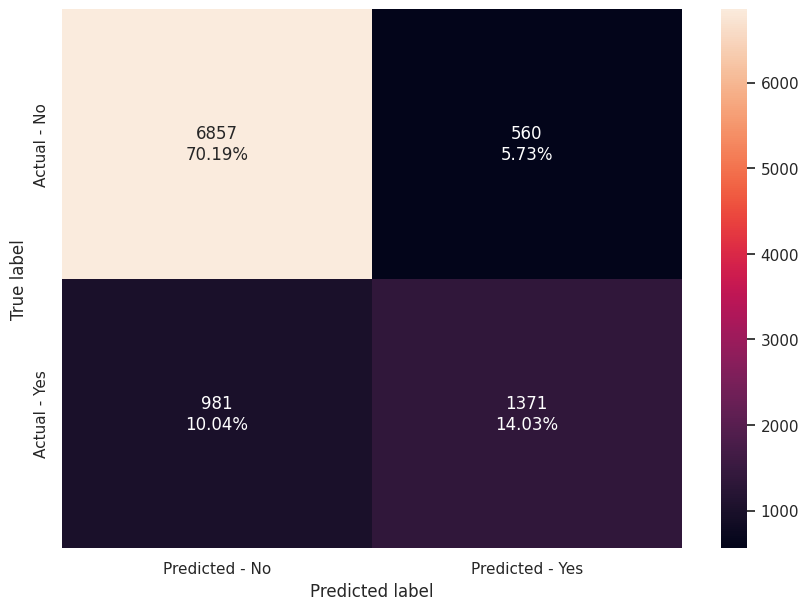

In [ ]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)




## **3.   Decision Tree:**




In [ ]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

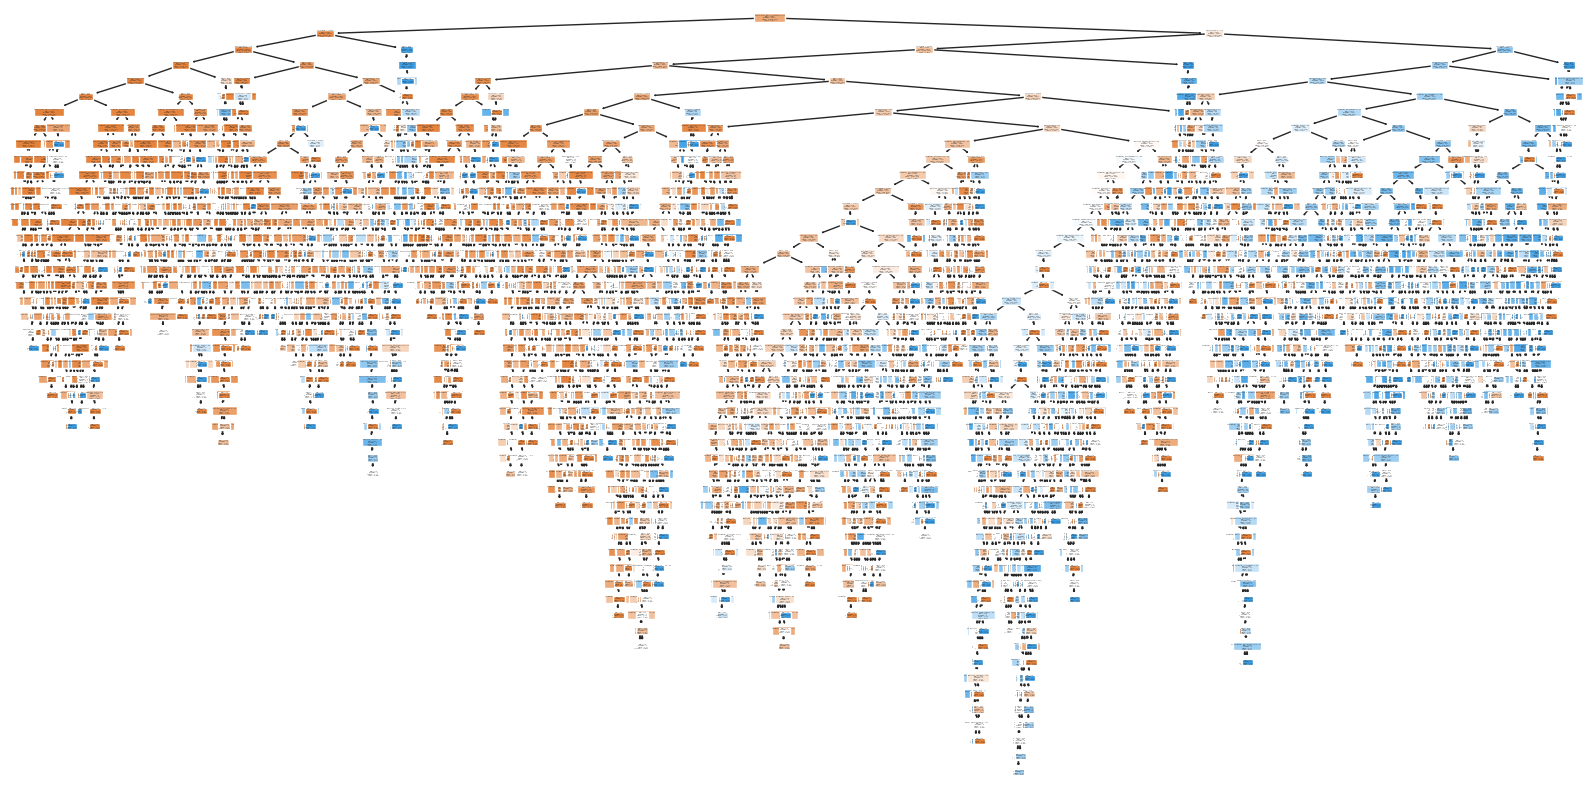

In [ ]:
#Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()

In [ ]:
#Predict the values on the test set
y_test_pred = dt.predict(X_test)


In [ ]:
#Build a confusion matrix and calculate accuracy
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[6543  874]
 [ 932 1420]]
Accuracy: 0.8151294912478247


Accuracy on training set :  0.9788522288522289
Accuracy on test set :  0.8151294912478247
Recall on training set :  0.9276735288759337
Recall on test set :  0.6037414965986394
Precision on training set :  0.9835812246474792
Precision on test set :  0.6190061028770706


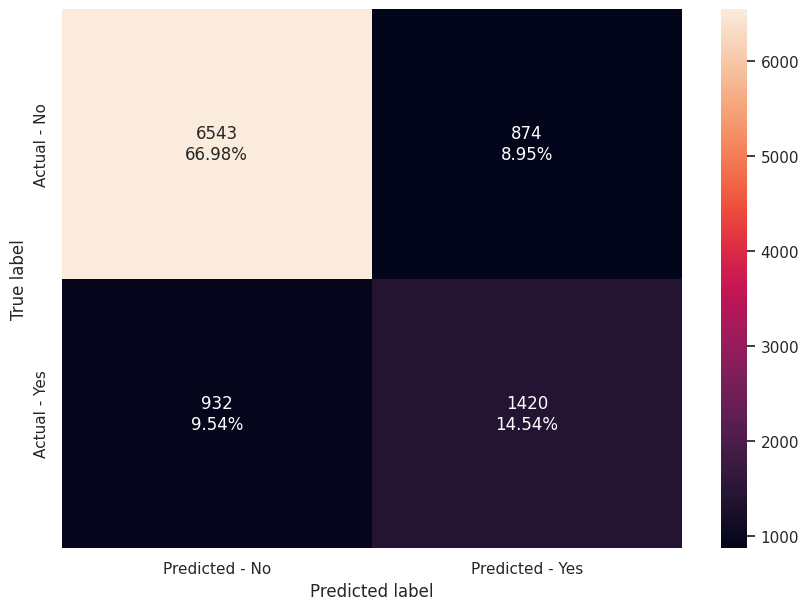

In [ ]:
#Calculating Different Metrics
scores_dt = get_metrics_score(dt,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(dt,y_test)

In [ ]:
#Build a random forest model
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)



## **4.  Random Forest**



In [ ]:
#Build a random forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
#Predict values on the test set
y_test_pred = rf.predict(X_test)

In [ ]:
#Build a confusion matrix and calculate accuracy
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[6803  614]
 [ 913 1439]]
Accuracy: 0.8436892210052206


Accuracy on training set :  0.9788522288522289
Accuracy on test set :  0.8436892210052206
Recall on training set :  0.9468026963016943
Recall on test set :  0.6118197278911565
Precision on training set :  0.9647299053276406
Precision on test set :  0.7009254749147589


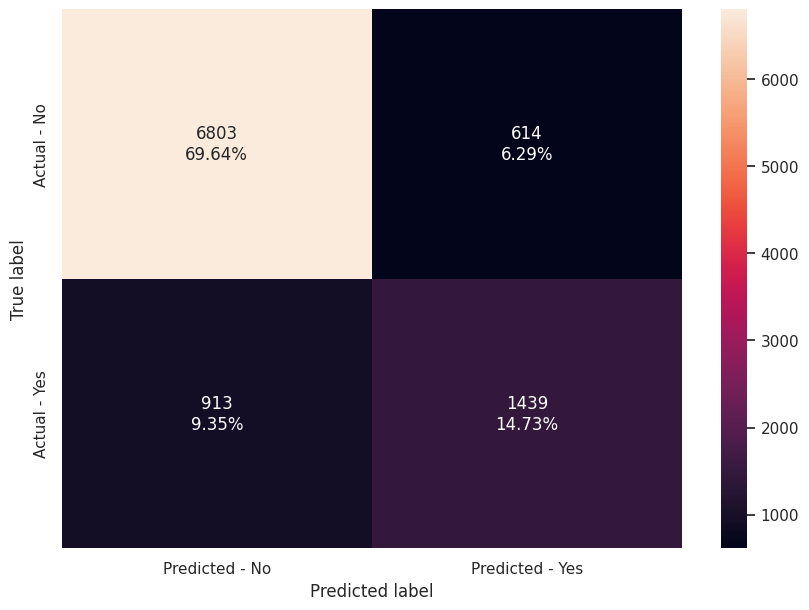

In [ ]:
#Calculating Different Metrics
scores_dt = get_metrics_score(rf,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(rf,y_test)